# ***Predictive Quality in Additive Manufacturing***

Week 1: Data exploration
 Which structure has the production system? Are all features present for all products?
 Which product clusters can be identified based on the existence of features? Do features
 correlate? Are there outliers in the features?

## Data import and visualization

All necessary packages 

In [10]:
%pip install openpyxl

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [12]:
#!pip install openpyxl
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import matplotlib.patches as mpatches

In [13]:
# change data_path according to the path of data
current_path = os.getcwd()
print("current pth:", current_path)
#data_path = os.path.dirname(current_path)
if os.path.exists("02_Data"):
    data_path = ("02_Data")
    print("Data has been founded at:", data_path)
else:
    print("Can`t find Data")
Audio_path = os.path.join(data_path,"01_Audio")
#print("Audio:", Audio_path)
Audio_files = [ f for f in os.listdir(Audio_path) if f.endswith(".csv")]
print("Audio_files are: ", Audio_files)
list_Audio = []
id_Audio = []
for file_name in Audio_files:
    file_path = os.path.join(Audio_path,file_name)
    #get data
    df = pd.read_csv(file_path)
    list_Audio.append(df)
    #get data id
    id_Audio.append(int(os.path.splitext(os.path.basename(file_path))[0]))
print("Audio_len: ",len(list_Audio))
print("shape of list_Audio:", list_Audio[0].shape) 


Weldqas_path = os.path.join(data_path,"02_Weldqas")
Weldqas_files = [ j for j in os.listdir(Weldqas_path) if j.endswith(".csv")]
print("Weldqas_files are: ", Weldqas_files)
list_Weldqas = []
for file_name in Weldqas_files:
    file_path = os.path.join(Weldqas_path,file_name)
    df = pd.read_csv(file_path)
    list_Weldqas.append(df)
print("Weldqas_len: ",len(list_Weldqas))
print("shape of list_Weldqas:", list_Weldqas[0].shape) 
##get the path o excel
excel_paths = []
for root, dirs, files in os.walk(data_path):
    for file in files:
        if file.endswith(".xlsx"):
            excel_paths.append(os.path.join(data_path,file))
print(excel_paths)

current pth: /Users/macbook/Desktop/TUM/kecheng/KIGp
Data has been founded at: 02_Data
Audio_files are:  ['223.csv', '237.csv', '169.csv', '196.csv', '182.csv', '357.csv', '343.csv', '425.csv', '419.csv', '394.csv', '380.csv', '381.csv', '395.csv', '418.csv', '342.csv', '424.csv', '356.csv', '183.csv', '197.csv', '236.csv', '222.csv', '234.csv', '220.csv', '208.csv', '181.csv', '195.csv', '426.csv', '340.csv', '354.csv', '368.csv', '383.csv', '397.csv', '396.csv', '382.csv', '369.csv', '355.csv', '427.csv', '341.csv', '194.csv', '180.csv', '209.csv', '221.csv', '235.csv', '219.csv', '231.csv', '225.csv', '184.csv', '190.csv', '379.csv', '345.csv', '423.csv', '351.csv', '386.csv', '392.csv', '393.csv', '387.csv', '350.csv', '344.csv', '422.csv', '378.csv', '191.csv', '185.csv', '224.csv', '230.csv', '218.csv', '226.csv', '232.csv', '178.csv', '193.csv', '187.csv', '408.csv', '352.csv', '420.csv', '346.csv', '391.csv', '385.csv', '384.csv', '390.csv', '421.csv', '347.csv', '353.csv', '40

# Read Excel

In [14]:
#get the header of table
excel_df = pd.read_excel(excel_paths[0], sheet_name=0,skiprows=10)
print(excel_df.columns)
df_Usage = excel_df[["Number of Measurement",'Dataset']]
"""
Audio_df_without_label = pd.DataFrame({
    "Number of Measurement": id_Audio,
    "DAta of Audio": list_Audio
})
"""
label_map = dict(zip(df_Usage["Number of Measurement"], df_Usage["Dataset"]))

# conbine csv data with excel
audio_list_with_labels = []

for id_, audio in zip(id_Audio, list_Audio):
    label = label_map.get(id_, None)  
    audio_list_with_labels.append({
        "id": id_,
        "audio": audio,
        "label": label
    })


ValueError: Excel file format cannot be determined, you must specify an engine manually.

In [15]:
print(audio_list_with_labels[0])

NameError: name 'audio_list_with_labels' is not defined

audio_list_with_labels is the combination of audio and label

# Audio part

### read function to read a single file and print it out

In [20]:
# read single file
#file_path = os.path.join(Audio_path,"169.csv")
#df = pd.read_csv(file_path)
#pd.set_option('display.max_rows', None)
def ReadSingleAudio(id_Audio):
    for sample in audio_list_with_labels:
        
        if sample['id'] == id_Audio:
                 
            df = pd.DataFrame({
                "Measurement": sample['audio']['M'],
                "Time":sample['audio']['Time'],
                
                })
            
            print(df)
            #df.info()
            x = df["Time"]
            y = df["Measurement"]
            plt.figure(figsize=(30, 4)) 
            plt.plot(x,y)

            plt.xlabel("Time (s)")
            plt.ylabel("Measurement ")
            plt.title(f" Audio ID : {id_Audio} | Label :{sample['label']}")
            plt.show()




In [19]:
ReadSingleAudio(318)

NameError: name 'audio_list_with_labels' is not defined

### High-pass fliter

[ 30.52215036  30.30919222  29.16472542 ... -12.9359497  -10.05499888
  -0.46627603]


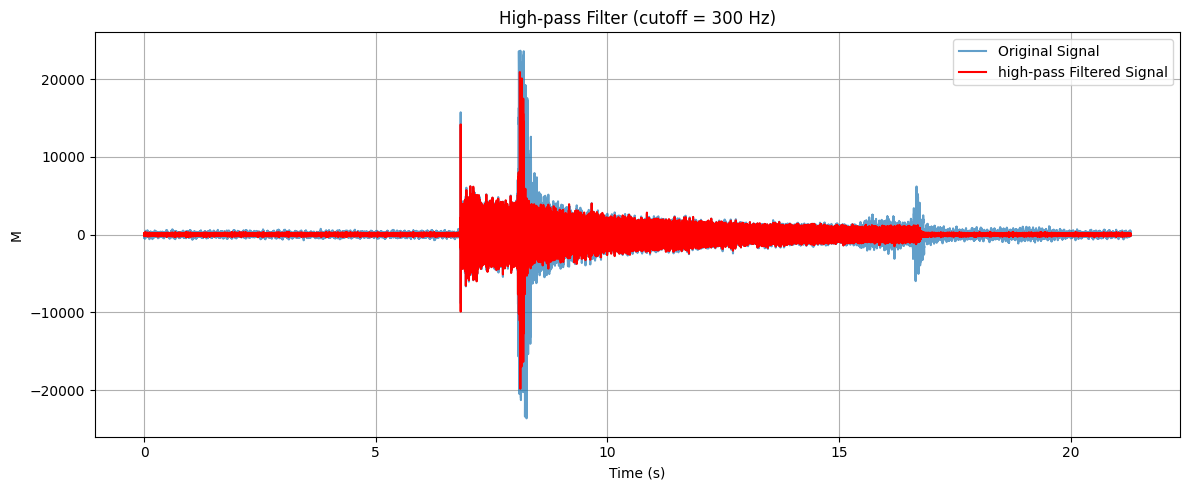

In [21]:
# create high-pass filter to dinimish background noise
from scipy.signal import butter, filtfilt

#Read the CSV file
file_path = os.path.join(Audio_path,"169.csv")
df = pd.read_csv(file_path)

# Extracting the 'Time' and 'M' columns
t = df['Time']
m = df['M']

#define high-pass filter
def butter_highpass(cutoff, fs, order=5):
    nyq = 0.5 * fs              # Nyquist frequency
    normal_cutoff = cutoff / nyq                # Normalize the cutoff frequency
    b, a = butter(order, normal_cutoff, btype='high', analog=False)             #filter coefficients
    return b, a

#define high-pass filter function
def highpass_filter(data, cutoff, fs, order=5):
    b, a = butter_highpass(cutoff, fs, order=order)             #get filter coefficients
    y = filtfilt(b, a, data)                #Apply zero-phase filtering to avoid phase distortion
    return y

#Calculate the sampling frequency from the time data
fs = 1 / (t[1] - t[0])              # Sampling frequency
cutoff = 300               # Cutoff frequency in Hz

# Apply the high-pass filter to the signals
m_filtered = highpass_filter(m, cutoff, fs, order=3)
print(m_filtered)
#Plot the original and filtered signals
plt.figure(figsize=(12, 5))
plt.plot(t, m, label='Original Signal', alpha=0.7)
plt.plot(t, m_filtered, label='high-pass Filtered Signal', color='red')
plt.xlabel('Time (s)')
plt.ylabel('M')
plt.title(f'High-pass Filter (cutoff = {cutoff} Hz)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


### FFT

Estimated sampling rate (sr): 48000 Hz


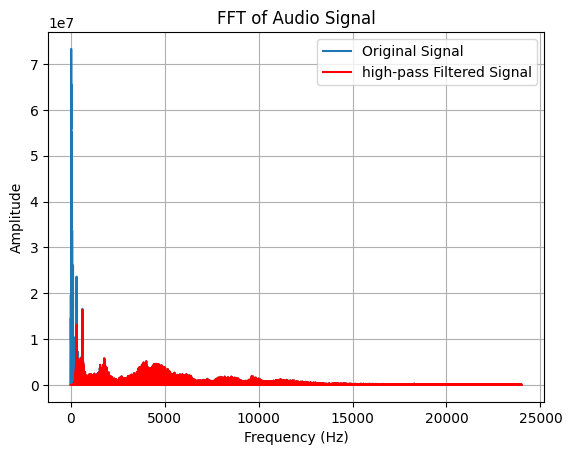

[0.00000000e+00 4.69689379e-02 9.39378758e-02 ... 2.39998591e+04
 2.39999061e+04 2.39999530e+04] 450211.4457939161 73283746.93857527


In [22]:
# FFT
file_path = os.path.join(Audio_path,"169.csv")
df = pd.read_csv(file_path)
# Perform the Fast Fourier Transform (FFT) on the audio signal in column "M"
Y = np.fft.fft(df["M"])
# Compute the frequency bins corresponding to the FFT result
# Estimated sampling rate based on test data
delta_t = df["Time"][1] - df["Time"][0]
sr = round(1 / delta_t)
print(f"Estimated sampling rate (sr): {sr} Hz")

frequencies = np.fft.fftfreq(len(df["M"]), d=1/sr)
#apply high-pass filter
cutoff = 300
m_filtered = highpass_filter(df["M"], cutoff, sr, order=3)
filtered_frequencies = np.fft.fft(m_filtered)

#print(m_filtered)
# Plot the magnitude spectrum (only the positive half of frequencies and amplitudes)
plt.plot(frequencies[:len(frequencies)//2], np.abs(Y)[:len(Y)//2], label='Original Signal')
plt.plot(frequencies[:len(frequencies)//2], np.abs(filtered_frequencies)[:len(filtered_frequencies)//2], label='high-pass Filtered Signal', color='red')
plt.xlabel("Frequency (Hz)")
plt.ylabel("Amplitude")
plt.title("FFT of Audio Signal")
plt.legend()
plt.grid(True)
plt.show()

peak_freq = frequencies[:len(frequencies)//2]
mean_amp = np.mean(np.abs(Y[:len(Y)//2]))
max_amp = np.max(np.abs(Y[:len(Y)//2]))

print(peak_freq, mean_amp, max_amp)


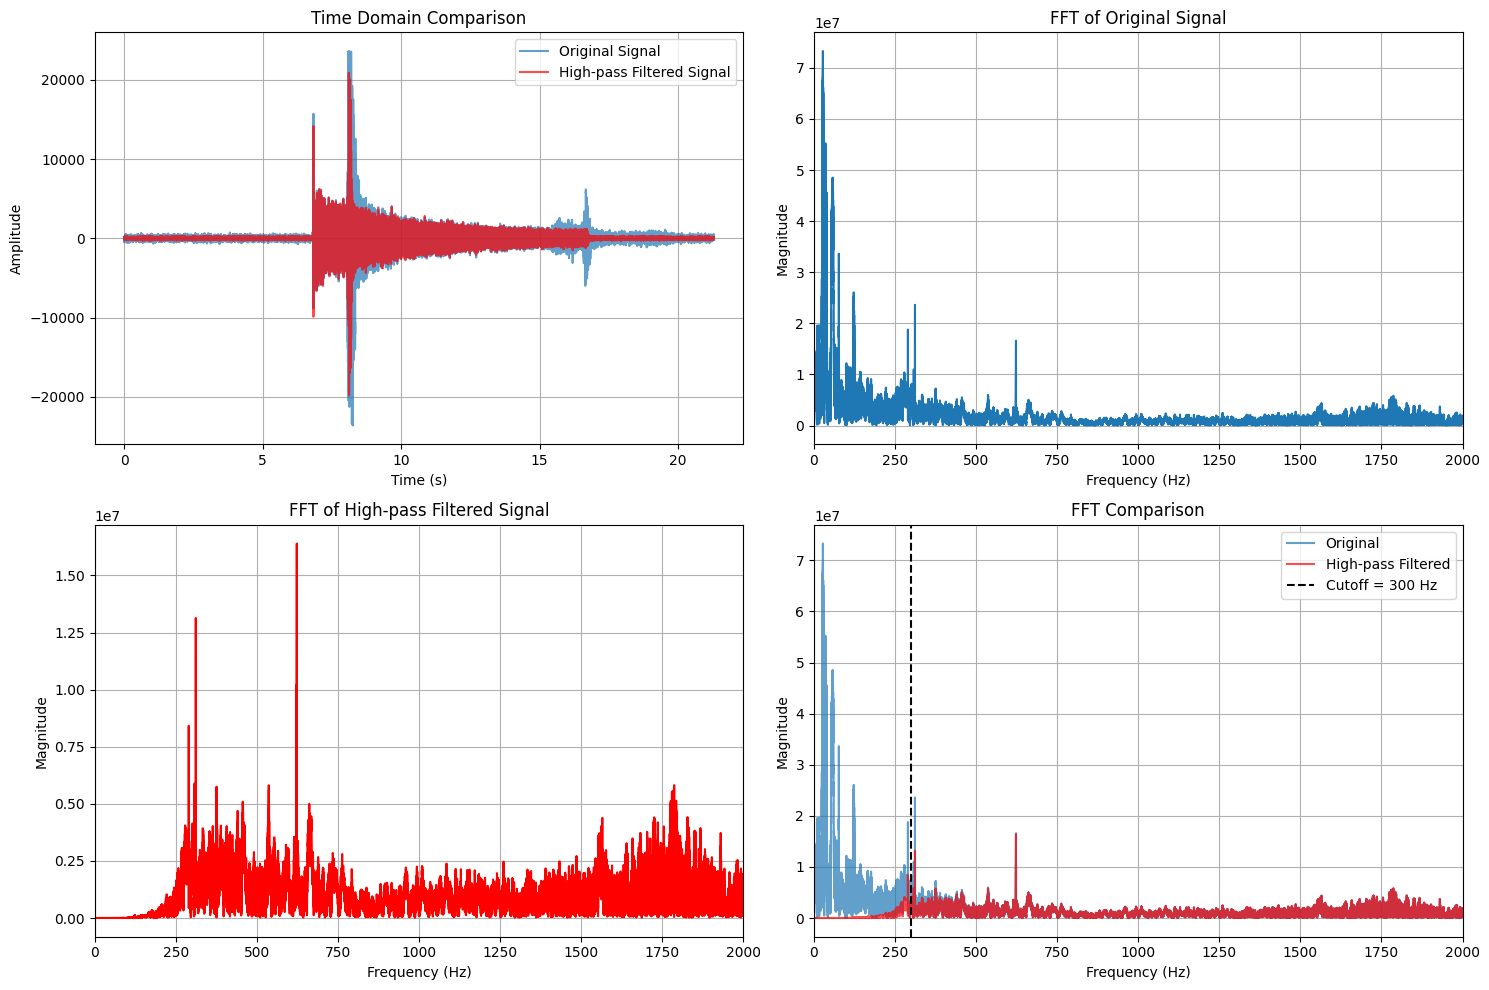

采样频率: 48000.0 Hz
截止频率: 300 Hz

原始信号:
  低频能量 (<300Hz): 9.46e+17
  高频能量 (≥300Hz): 2.07e+17

滤波后信号:
  低频能量 (<300Hz): 4.45e+15
  高频能量 (≥300Hz): 1.95e+17

滤波效果:
  低频能量减少: 99.5%
  高频能量保持: 94.0%


In [23]:
# 使用您的高通滤波器代码
from scipy.signal import butter, filtfilt
import numpy as np
import matplotlib.pyplot as plt

# 读取数据
file_path = os.path.join(Audio_path, "169.csv")
df = pd.read_csv(file_path)
t = df['Time']
m = df['M']

# 您的高通滤波器函数（保持不变）
def butter_highpass(cutoff, fs, order=5):
    nyq = 0.5 * fs
    normal_cutoff = cutoff / nyq
    b, a = butter(order, normal_cutoff, btype='high', analog=False)
    return b, a

def highpass_filter(data, cutoff, fs, order=5):
    b, a = butter_highpass(cutoff, fs, order=order)
    y = filtfilt(b, a, data)
    return y

# 计算采样频率
fs = 1 / (t[1] - t[0])
cutoff = 300

# 应用高通滤波器
m_filtered = highpass_filter(m, cutoff, fs, order=3)

# 计算FFT - 原始信号和滤波后信号
Y_original = np.fft.fft(m)
Y_filtered = np.fft.fft(m_filtered)
frequencies = np.fft.fftfreq(len(m), d=1/fs)

# 只取正频率部分
pos_freq_idx = frequencies >= 0
frequencies_pos = frequencies[pos_freq_idx]
Y_original_pos = Y_original[pos_freq_idx]
Y_filtered_pos = Y_filtered[pos_freq_idx]

# 创建对比图
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# 时域对比
axes[0, 0].plot(t, m, label='Original Signal', alpha=0.7)
axes[0, 0].plot(t, m_filtered, label='High-pass Filtered Signal', color='red', alpha=0.7)
axes[0, 0].set_xlabel('Time (s)')
axes[0, 0].set_ylabel('Amplitude')
axes[0, 0].set_title('Time Domain Comparison')
axes[0, 0].legend()
axes[0, 0].grid(True)

# 频域 - 原始信号
axes[0, 1].plot(frequencies_pos, np.abs(Y_original_pos))
axes[0, 1].set_xlabel('Frequency (Hz)')
axes[0, 1].set_ylabel('Magnitude')
axes[0, 1].set_title('FFT of Original Signal')
axes[0, 1].set_xlim(0, 2000)  # 限制显示范围以便观察
axes[0, 1].grid(True)

# 频域 - 滤波后信号
axes[1, 0].plot(frequencies_pos, np.abs(Y_filtered_pos), color='red')
axes[1, 0].set_xlabel('Frequency (Hz)')
axes[1, 0].set_ylabel('Magnitude')
axes[1, 0].set_title('FFT of High-pass Filtered Signal')
axes[1, 0].set_xlim(0, 2000)
axes[1, 0].grid(True)

# 频域叠加对比
axes[1, 1].plot(frequencies_pos, np.abs(Y_original_pos), label='Original', alpha=0.7)
axes[1, 1].plot(frequencies_pos, np.abs(Y_filtered_pos), label='High-pass Filtered', color='red', alpha=0.7)
axes[1, 1].axvline(x=cutoff, color='black', linestyle='--', label=f'Cutoff = {cutoff} Hz')
axes[1, 1].set_xlabel('Frequency (Hz)')
axes[1, 1].set_ylabel('Magnitude')
axes[1, 1].set_title('FFT Comparison')
axes[1, 1].set_xlim(0, 2000)
axes[1, 1].legend()
axes[1, 1].grid(True)

plt.tight_layout()
plt.show()

# 分析滤波效果
print(f"采样频率: {fs:.1f} Hz")
print(f"截止频率: {cutoff} Hz")

# 计算低频和高频的能量
low_freq_mask = frequencies_pos < cutoff
high_freq_mask = frequencies_pos >= cutoff

# 原始信号的低频和高频能量
low_energy_orig = np.sum(np.abs(Y_original_pos[low_freq_mask])**2)
high_energy_orig = np.sum(np.abs(Y_original_pos[high_freq_mask])**2)

# 滤波后信号的低频和高频能量
low_energy_filt = np.sum(np.abs(Y_filtered_pos[low_freq_mask])**2)
high_energy_filt = np.sum(np.abs(Y_filtered_pos[high_freq_mask])**2)

print(f"\n原始信号:")
print(f"  低频能量 (<{cutoff}Hz): {low_energy_orig:.2e}")
print(f"  高频能量 (≥{cutoff}Hz): {high_energy_orig:.2e}")

print(f"\n滤波后信号:")
print(f"  低频能量 (<{cutoff}Hz): {low_energy_filt:.2e}")
print(f"  高频能量 (≥{cutoff}Hz): {high_energy_filt:.2e}")

print(f"\n滤波效果:")
print(f"  低频能量减少: {(1 - low_energy_filt/low_energy_orig)*100:.1f}%")
print(f"  高频能量保持: {(high_energy_filt/high_energy_orig)*100:.1f}%")

### Apply filter on all Data

In [24]:
print(audio_list_with_labels)

NameError: name 'audio_list_with_labels' is not defined

In [26]:
from tqdm import tqdm
cutoff = 100  # Cutoff frequency in Hz
order = 3  # Filter order
Audio_list_filt = []
## use tqdm to show process in real time
for audio_data in tqdm(audio_list_with_labels, desc="apply high-pass filter"):
   # get data
   audio_id = audio_data['id']
   df_audio = audio_data['audio'].copy()
   label = audio_data['label']
   
   # calcute fs and apply filter
   t = df_audio['Time'].values
   m = df_audio['M'].values
   fs = 1 / (t[1] - t[0])
   m_filtered = highpass_filter(m, cutoff=100, fs=fs, order=3)
   
   # substitute data
   df_audio['M'] = m_filtered
   
   # add data
   Audio_list_filt.append({
       'id': audio_id,
       'audio': df_audio,
       'label': label
   })  


ModuleNotFoundError: No module named 'tqdm'

In [36]:
print(Audio_list_filt)

[{'id': 169, 'audio':          Unnamed: 0       Time          M
0                 0   0.000000  72.687509
1                 1   0.000021  71.039365
2                 2   0.000042  68.390787
3                 3   0.000063  72.741742
4                 4   0.000083  68.092194
...             ...        ...        ...
1021947     1021947  21.290563 -83.923359
1021948     1021948  21.290583 -75.507221
1021949     1021949  21.290604 -63.097366
1021950     1021950  21.290625 -58.693760
1021951     1021951  21.290646 -47.296368

[1021952 rows x 3 columns], 'label': 'iO'}, {'id': 170, 'audio':          Unnamed: 0       Time          M
0                 0   0.000000 -52.385608
1                 1   0.000021 -40.482330
2                 2   0.000042 -32.577599
3                 3   0.000063 -22.671223
4                 4   0.000083 -12.763011
...             ...        ...        ...
1262587     1262587  26.303896 -29.523751
1262588     1262588  26.303917 -23.823523
1262589     1262589  26.303937

**so we get Audio data which has been applied High-pass filter :Audio_list_file**

### Mean

Combined mean comparison data:
   Number of Measurement  Mean of Audio Label of Audio  Mean of Audio Filtered
0                    169      -0.011418             iO               -0.002351
1                    170       0.014857             iO                0.009428
2                    171       0.057396             iO                0.007450
3                    172      -0.172601             iO               -0.004094
4                    173      -0.183890             iO                0.001616
Data shape: (201, 4)


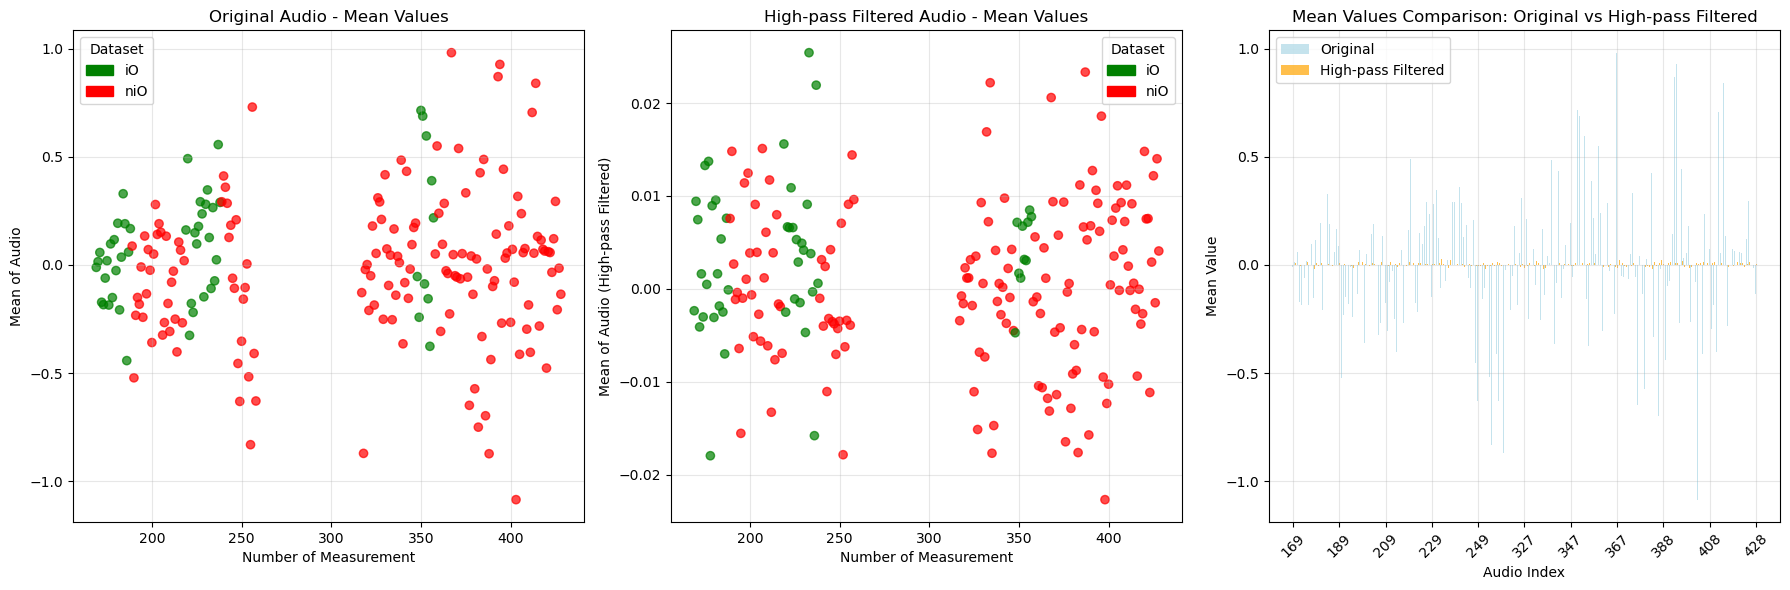


STATISTICAL COMPARISON
Original Audio Mean Statistics:
  Overall Mean: 0.003
  Standard Deviation: 0.328
  Min: -1.086
  Max: 0.981

High-pass Filtered Audio Mean Statistics:
  Overall Mean: 0.001
  Standard Deviation: 0.009
  Min: -0.023
  Max: 0.025

Mean Difference (Original - Filtered):
  Average Difference: 0.002
  Standard Deviation of Difference: 0.329
  Max Absolute Difference: 1.089

Statistics by Dataset:

iO Label of Audio:
  Original Mean: 0.079 ± 0.265
  Filtered Mean: 0.004 ± 0.008
  Count: 50 samples

niO Label of Audio:
  Original Mean: -0.022 ± 0.344
  Filtered Mean: 0.000 ± 0.009
  Count: 151 samples


In [54]:
# Calculate mean of original audio data based on M column
mean_list_original = [df['audio']["M"].values.mean() for df in audio_list_with_labels]
id_list = [audio_data['id'] for audio_data in audio_list_with_labels]
label_list = [audio_data['label'] for audio_data in audio_list_with_labels]
mean_df_original = pd.DataFrame({
    "Number of Measurement": id_list,
    "Mean of Audio": mean_list_original,
    "Label of Audio": label_list
})


# Calculate mean of filtered audio data based on M column
mean_list_filtered = [audio_data["audio"]["M"].values.mean() for audio_data in Audio_list_filt]
id_filtered = [audio_data["id"] for audio_data in Audio_list_filt]
label_filtered = [audio_data['label'] for audio_data in Audio_list_filt]
mean_df_filtered = pd.DataFrame({
    "Number of Measurement": id_filtered,
    "Mean of Audio Filtered": mean_list_filtered,
    "Label of Audio": label_filtered
})

# Combine both datasets for comparison
Audio_mean_comparison = mean_df_original.merge(
    mean_df_filtered[["Number of Measurement", "Mean of Audio Filtered"]], 
    on="Number of Measurement", 
    how="left"
)

print("Combined mean comparison data:")
print(Audio_mean_comparison.head())
print(f"Data shape: {Audio_mean_comparison.shape}")

# Create color mapping for datasets
colors = Audio_mean_comparison['Label of Audio'].map({'iO': 'green', 'niO': 'red'})

# Create subplot comparison
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Plot 1: Original audio means
axes[0].scatter(Audio_mean_comparison['Number of Measurement'], 
                Audio_mean_comparison['Mean of Audio'], 
                c=colors, alpha=0.7)
axes[0].set_xlabel("Number of Measurement")
axes[0].set_ylabel("Mean of Audio")
axes[0].set_title("Original Audio - Mean Values")
axes[0].grid(True, alpha=0.3)

# Create legend
legend_handles = [
    mpatches.Patch(color='green', label='iO'),
    mpatches.Patch(color='red', label='niO')
]
axes[0].legend(handles=legend_handles, title="Dataset")

# Plot 2: Filtered audio means
axes[1].scatter(Audio_mean_comparison['Number of Measurement'], 
                Audio_mean_comparison['Mean of Audio Filtered'], 
                c=colors, alpha=0.7)
axes[1].set_xlabel("Number of Measurement")
axes[1].set_ylabel("Mean of Audio (High-pass Filtered)")
axes[1].set_title("High-pass Filtered Audio - Mean Values")
axes[1].grid(True, alpha=0.3)
axes[1].legend(handles=legend_handles, title="Dataset")

# Plot 3: Side-by-side comparison
x_positions = np.arange(len(Audio_mean_comparison))
width = 0.35

# Create bar plots for comparison
bars1 = axes[2].bar(x_positions - width/2, Audio_mean_comparison['Mean of Audio'], 
                   width, label='Original', alpha=0.7, color='lightblue')
bars2 = axes[2].bar(x_positions + width/2, Audio_mean_comparison['Mean of Audio Filtered'], 
                   width, label='High-pass Filtered', alpha=0.7, color='orange')

axes[2].set_xlabel("Audio Index")
axes[2].set_ylabel("Mean Value")
axes[2].set_title("Mean Values Comparison: Original vs High-pass Filtered")
axes[2].legend()
axes[2].grid(True, alpha=0.3)

# Set x-axis labels to show actual measurement numbers (optional, might be crowded)
if len(Audio_mean_comparison) <= 20:  # Only show labels if not too many data points
    axes[2].set_xticks(x_positions)
    axes[2].set_xticklabels(Audio_mean_comparison['Number of Measurement'], rotation=45)
else:
    axes[2].set_xticks(x_positions[::len(x_positions)//10])  # Show every 10th label
    axes[2].set_xticklabels(Audio_mean_comparison['Number of Measurement'].iloc[::len(x_positions)//10], rotation=45)

plt.tight_layout()
plt.show()

# Statistical comparison
print("\n" + "="*50)
print("STATISTICAL COMPARISON")
print("="*50)
print(f"Original Audio Mean Statistics:")
print(f"  Overall Mean: {Audio_mean_comparison['Mean of Audio'].mean():.3f}")
print(f"  Standard Deviation: {Audio_mean_comparison['Mean of Audio'].std():.3f}")
print(f"  Min: {Audio_mean_comparison['Mean of Audio'].min():.3f}")
print(f"  Max: {Audio_mean_comparison['Mean of Audio'].max():.3f}")

print(f"\nHigh-pass Filtered Audio Mean Statistics:")
print(f"  Overall Mean: {Audio_mean_comparison['Mean of Audio Filtered'].mean():.3f}")
print(f"  Standard Deviation: {Audio_mean_comparison['Mean of Audio Filtered'].std():.3f}")
print(f"  Min: {Audio_mean_comparison['Mean of Audio Filtered'].min():.3f}")
print(f"  Max: {Audio_mean_comparison['Mean of Audio Filtered'].max():.3f}")

# Calculate difference statistics
mean_difference = Audio_mean_comparison['Mean of Audio'] - Audio_mean_comparison['Mean of Audio Filtered']
print(f"\nMean Difference (Original - Filtered):")
print(f"  Average Difference: {mean_difference.mean():.3f}")
print(f"  Standard Deviation of Difference: {mean_difference.std():.3f}")
print(f"  Max Absolute Difference: {abs(mean_difference).max():.3f}")

# Group statistics by dataset
print(f"\nStatistics by Dataset:")
for dataset in ['iO', 'niO']:
    mask = Audio_mean_comparison['Label of Audio'] == dataset
    if mask.any():
        orig_means = Audio_mean_comparison.loc[mask, 'Mean of Audio']
        filt_means = Audio_mean_comparison.loc[mask, 'Mean of Audio Filtered']
        print(f"\n{dataset} Label of Audio:")
        print(f"  Original Mean: {orig_means.mean():.3f} ± {orig_means.std():.3f}")
        print(f"  Filtered Mean: {filt_means.mean():.3f} ± {filt_means.std():.3f}")
        print(f"  Count: {mask.sum()} samples")
        

### Std

Combined std comparison data:
   Number of Measurement  Std of Audio Label of Audio  Std of Audio Filtered
0                    169   1485.917267             iO             761.644741
1                    170   1353.614509             iO             730.995281
2                    171   1607.308788             iO             857.518538
3                    172   1684.633736             iO             870.943602
4                    173   1668.711885             iO             846.781460
Data shape: (201, 4)


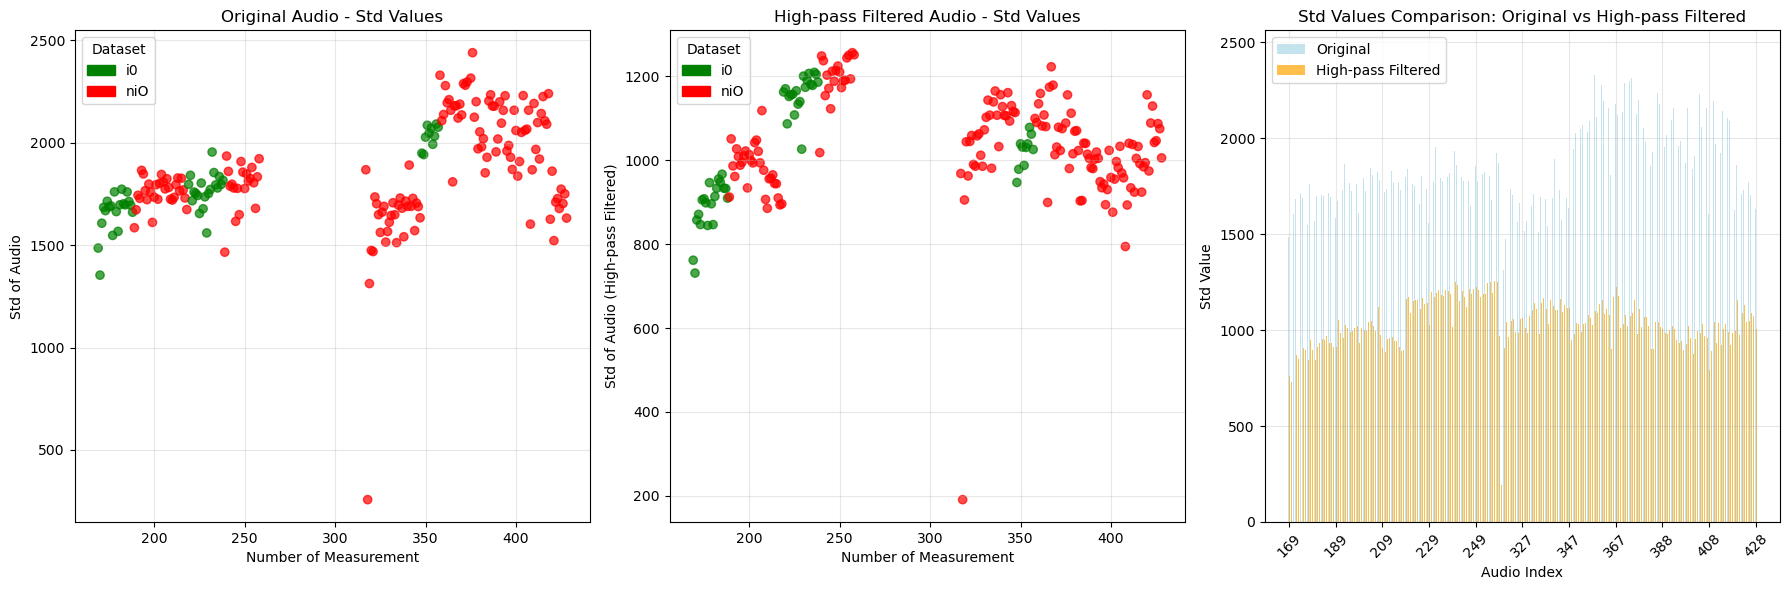


STATISTICAL COMPARISON
Original Audio Std Statistics:
  Overall Mean: 1840.450
  Standard Deviation: 243.568
  Min: 257.260
  Max: 2439.949

High-pass Filtered Audio Std Statistics:
  Overall Mean: 1035.761
  Standard Deviation: 122.166
  Min: 190.817
  Max: 1256.405

Std Difference (Original - Filtered):
  Average Difference: 804.689
  Standard Deviation of Difference: 229.927
  Max Absolute Difference: 1284.212

Statistics by Dataset:

niO Label of Audio:
  Original Std: 1861.504 ± 262.151
  Filtered Std: 1039.547 ± 119.051
  Count: 151 samples


In [56]:
# Calculate std of original audio data based on M column
std_list_original = [audio_data['audio']["M"].values.std() for audio_data in audio_list_with_labels]
id_list = [audio_data['id'] for audio_data in audio_list_with_labels]
label_list = [audio_data['label'] for audio_data in audio_list_with_labels]
std_df_original = pd.DataFrame({
    "Number of Measurement": id_list,
    "Std of Audio": std_list_original,
    "Label of Audio": label_list
})

# Calculate std of filtered audio data based on M column
std_list_filtered = [audio_data["audio"]["M"].values.std() for audio_data in Audio_list_filt]
id_filtered = [audio_data["id"] for audio_data in Audio_list_filt]
label_filtered = [audio_data['label'] for audio_data in Audio_list_filt]
std_df_filtered = pd.DataFrame({
    "Number of Measurement": id_filtered,
    "Std of Audio Filtered": std_list_filtered,
    "Label of Audio": label_filtered
})

# Combine both datasets for comparison
Audio_std_comparison = std_df_original.merge(
    std_df_filtered[["Number of Measurement", "Std of Audio Filtered"]], 
    on="Number of Measurement", 
    how="left"
)

print("Combined std comparison data:")
print(Audio_std_comparison.head())
print(f"Data shape: {Audio_std_comparison.shape}")

# Create color mapping for datasets
colors = Audio_std_comparison['Label of Audio'].map({'iO': 'green', 'niO': 'red'})

# Create subplot comparison
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Plot 1: Original audio stds
axes[0].scatter(Audio_std_comparison['Number of Measurement'], 
                Audio_std_comparison['Std of Audio'], 
                c=colors, alpha=0.7)
axes[0].set_xlabel("Number of Measurement")
axes[0].set_ylabel("Std of Audio")
axes[0].set_title("Original Audio - Std Values")
axes[0].grid(True, alpha=0.3)

# Create legend
legend_handles = [
    mpatches.Patch(color='green', label='i0'),
    mpatches.Patch(color='red', label='niO')
]
axes[0].legend(handles=legend_handles, title="Dataset")

# Plot 2: Filtered audio stds
axes[1].scatter(Audio_std_comparison['Number of Measurement'], 
                Audio_std_comparison['Std of Audio Filtered'], 
                c=colors, alpha=0.7)
axes[1].set_xlabel("Number of Measurement")
axes[1].set_ylabel("Std of Audio (High-pass Filtered)")
axes[1].set_title("High-pass Filtered Audio - Std Values")
axes[1].grid(True, alpha=0.3)
axes[1].legend(handles=legend_handles, title="Dataset")

# Plot 3: Side-by-side comparison
x_positions = np.arange(len(Audio_std_comparison))
width = 0.35

# Create bar plots for comparison
bars1 = axes[2].bar(x_positions - width/2, Audio_std_comparison['Std of Audio'], 
                   width, label='Original', alpha=0.7, color='lightblue')
bars2 = axes[2].bar(x_positions + width/2, Audio_std_comparison['Std of Audio Filtered'], 
                   width, label='High-pass Filtered', alpha=0.7, color='orange')

axes[2].set_xlabel("Audio Index")
axes[2].set_ylabel("Std Value")
axes[2].set_title("Std Values Comparison: Original vs High-pass Filtered")
axes[2].legend()
axes[2].grid(True, alpha=0.3)

# Set x-axis labels to show actual measurement numbers (optional, might be crowded)
if len(Audio_std_comparison) <= 20:  # Only show labels if not too many data points
    axes[2].set_xticks(x_positions)
    axes[2].set_xticklabels(Audio_std_comparison['Number of Measurement'], rotation=45)
else:
    axes[2].set_xticks(x_positions[::len(x_positions)//10])  # Show every 10th label
    axes[2].set_xticklabels(Audio_std_comparison['Number of Measurement'].iloc[::len(x_positions)//10], rotation=45)

plt.tight_layout()
plt.show()

# Statistical comparison
print("\n" + "="*50)
print("STATISTICAL COMPARISON")
print("="*50)
print(f"Original Audio Std Statistics:")
print(f"  Overall Mean: {Audio_std_comparison['Std of Audio'].mean():.3f}")
print(f"  Standard Deviation: {Audio_std_comparison['Std of Audio'].std():.3f}")
print(f"  Min: {Audio_std_comparison['Std of Audio'].min():.3f}")
print(f"  Max: {Audio_std_comparison['Std of Audio'].max():.3f}")

print(f"\nHigh-pass Filtered Audio Std Statistics:")
print(f"  Overall Mean: {Audio_std_comparison['Std of Audio Filtered'].mean():.3f}")
print(f"  Standard Deviation: {Audio_std_comparison['Std of Audio Filtered'].std():.3f}")
print(f"  Min: {Audio_std_comparison['Std of Audio Filtered'].min():.3f}")
print(f"  Max: {Audio_std_comparison['Std of Audio Filtered'].max():.3f}")

# Calculate difference statistics
std_difference = Audio_std_comparison['Std of Audio'] - Audio_std_comparison['Std of Audio Filtered']
print(f"\nStd Difference (Original - Filtered):")
print(f"  Average Difference: {std_difference.mean():.3f}")
print(f"  Standard Deviation of Difference: {std_difference.std():.3f}")
print(f"  Max Absolute Difference: {abs(std_difference).max():.3f}")

# Group statistics by dataset
print(f"\nStatistics by Dataset:")
for dataset in ['i0', 'niO']:
    mask = Audio_std_comparison['Label of Audio'] == dataset
    if mask.any():
        orig_stds = Audio_std_comparison.loc[mask, 'Std of Audio']
        filt_stds = Audio_std_comparison.loc[mask, 'Std of Audio Filtered']
        print(f"\n{dataset} Label of Audio:")
        print(f"  Original Std: {orig_stds.mean():.3f} ± {orig_stds.std():.3f}")
        print(f"  Filtered Std: {filt_stds.mean():.3f} ± {filt_stds.std():.3f}")
        print(f"  Count: {mask.sum()} samples")

After that we can find a outlier around 318


In [28]:
std_values = std_df_filtered["Std of Audio Filtered"].values

mean = np.mean(std_values)
std = np.std(std_values)

threshold_upper = mean + 2 * std
threshold_lower = mean - 2 * std

outliers = std_df_filtered[(std_df_filtered["Std of Audio Filtered"] > threshold_upper) | (std_df_filtered["Std of Audio Filtered"] < threshold_lower)]
print(outliers)

NameError: name 'std_df_filtered' is not defined

### RMS

In [27]:
#get RMS of Audio based on M
RMS_list = [np.sqrt((df["M"]**2).mean()) for df in list_Audio]
RMS_df = pd.DataFrame({
    "Number of Measurement": id_Audio,
    "RMS of Audio": RMS_list
})
#merge RMS with Dataset of excel
Audio_RMS_df = RMS_df.merge(df_Usage, on="Number of Measurement", how="left")
print(Audio_RMS_df.head())

colors = Audio_RMS_df['Dataset'].map({'iO': 'green', 'niO': 'red'})
plt.scatter(Audio_RMS_df['Number of Measurement'],Audio_RMS_df['RMS of Audio'],c=colors)
plt.xlabel("Number of Measurement")
plt.ylabel("RMS of Audio")
legend_handles = [
    mpatches.Patch(color='green', label='iO'),
    mpatches.Patch(color='red', label='niO')
]
plt.legend(handles=legend_handles, title="Dataset")
plt.show()


NameError: name 'df_Usage' is not defined

it`s not meaningful, because RMS and std have similar structure, so they have almost same picture.

### Duration time of weld process

   Number of Measurement  Duration of Audio Dataset
0                    169           9.941333      iO
1                    170           7.936000      iO
2                    171           7.104000      iO
3                    172           7.392000      iO
4                    173           7.488000      iO


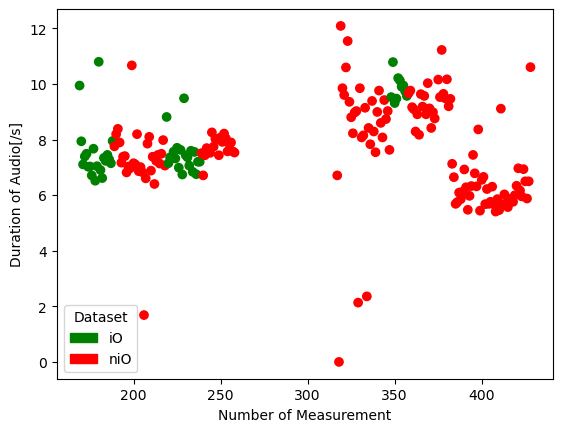

In [22]:
# compute duration time of weld process based on MFCC[0]
sr=48000
Duration = []
for df in list_Audio:
    mfccs_audio = librosa.feature.mfcc(y=df["M"].values.astype(np.float32), sr=sr, n_mfcc=13)
    duration = get_mfcc0_duration_over_threshold(mfccs_audio, 700, sr=sr)
    Duration.append(duration)

Duration_df = pd.DataFrame({
    "Number of Measurement": id_Audio,
    "Duration of Audio": Duration
})
#merge uration with Dataset of excel
Audio_Duration_df_df = Duration_df.merge(df_Usage, on="Number of Measurement", how="left")
print(Audio_Duration_df_df.head())

colors = Audio_Duration_df_df['Dataset'].map({'iO': 'green', 'niO': 'red'})
plt.scatter(Audio_Duration_df_df['Number of Measurement'],Audio_Duration_df_df['Duration of Audio'],c=colors)
plt.xlabel("Number of Measurement")
plt.ylabel("Duration of Audio[/s]")
legend_handles = [
    mpatches.Patch(color='green', label='iO'),
    mpatches.Patch(color='red', label='niO')
]
plt.legend(handles=legend_handles, title="Dataset")
plt.show()

### FFT of all data


Extracting dominant frequencies from 201 filtered audio files...

Extraction complete! Successfully processed 201 audio files

Results preview:
   Measurement Number  Dominant Frequency Label
0                 169          311.497996    iO
1                 170          311.549574    iO
2                 171          122.697368    iO
3                 172          122.804330    iO
4                 173          122.792751    iO
5                 174          123.152314    iO
6                 175          122.641509    iO
7                 176          122.233280    iO
8                 177          122.119035    iO
9                 178          122.188808    iO


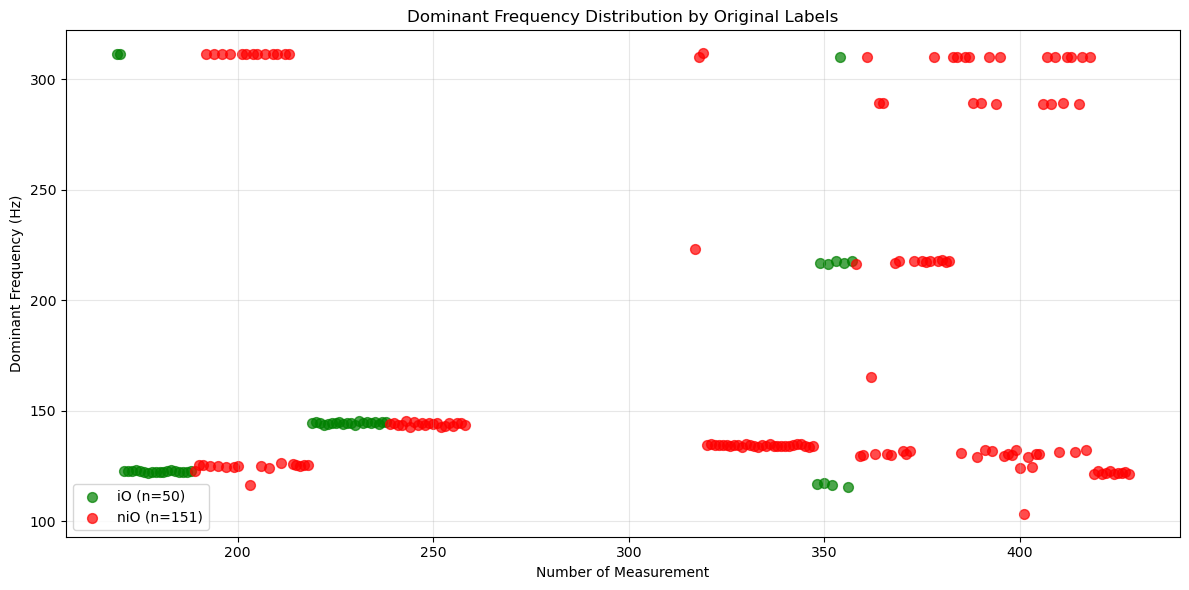


Dominant frequency statistics by original labels:
iO: Mean = 151.6 Hz, Std = 49.2 Hz, Range = [115.6, 311.5] Hz, Count = 50
niO: Mean = 182.8 Hz, Std = 75.5 Hz, Range = [103.5, 311.7] Hz, Count = 151


In [ ]:

# Lists to store results
freq_list = []  # List to store dominant frequencies
measurement_list = []  # List to store measurement numbers
label_list = []  # List to store original labels

print(f"Extracting dominant frequencies from {len(Audio_list_filt)} filtered audio files...")

# Loop through all filtered audio data
for audio_data in Audio_list_filt:
    
        # Extract data from the filtered audio
        measurement_number = audio_data['id']
        df_filtered = audio_data['audio']  # Already filtered data
        original_label = audio_data['label']
        
        #print(f"Processing audio ID: {measurement_number}")
        
        # Extract time and filtered measurement data
        t = df_filtered['Time'].values  # Time column
        m_filtered = df_filtered['M'].values  # Filtered measurement column
        
        # Calculate sampling frequency from time data
        fs = 1 / (t[1] - t[0])  # Sampling frequency
        
        # Compute FFT on the filtered signal
        N = len(m_filtered)  # Number of samples
        yf = fft(m_filtered)  # Perform Fast Fourier Transform (FFT)
        xf = fftfreq(N, 1 / fs)  # Generate frequency bins
        
        # Take positive frequencies only
        positive_idxs = xf > 0
        xf_positive = xf[positive_idxs]  # Positive frequencies
        yf_positive = np.abs(yf[positive_idxs])  # Corresponding magnitudes
        
        # Find dominant frequency (frequency with maximum magnitude)
        dom_freq = xf_positive[np.argmax(yf_positive)]
        
        #print(f"  Dominant frequency: {dom_freq:.1f} Hz")
        
        # Store results
        freq_list.append(dom_freq)
        measurement_list.append(measurement_number)
        label_list.append(original_label)
        
    

# Create DataFrame with results
dominant_freq_df = pd.DataFrame({
    'Measurement Number': measurement_list,
    'Dominant Frequency': freq_list,
    'Label': label_list
})

print(f"\nExtraction complete! Successfully processed {len(dominant_freq_df)} audio files")
print("\nResults preview:")
print(dominant_freq_df.head(10))

# Create scatter plot based on original labels
plt.figure(figsize=(12, 6))

# Define colors for different labels
color_map = {'iO': 'green', 
             'niO': 'red'}

# Plot scatter points for each label
for label in dominant_freq_df['Label'].unique():
    subset = dominant_freq_df[dominant_freq_df['Label'] == label]
    color = color_map.get(label, 'blue')  # Default to blue if label not in map
    plt.scatter(subset['Measurement Number'], subset['Dominant Frequency'], 
               color=color, label=f'{label} (n={len(subset)})', alpha=0.7, s=50)

plt.xlabel("Number of Measurement")
plt.ylabel("Dominant Frequency (Hz)")
plt.title("Dominant Frequency Distribution by Original Labels")
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Display frequency statistics by label
print(f"\nDominant frequency statistics by original labels:")
for label in dominant_freq_df['Label'].unique():
    subset = dominant_freq_df[dominant_freq_df['Label'] == label]
    freq_stats = subset['Dominant Frequency']
    print(f"{label}: Mean = {freq_stats.mean():.1f} Hz, Std = {freq_stats.std():.1f} Hz, "
          f"Range = [{freq_stats.min():.1f}, {freq_stats.max():.1f}] Hz, Count = {len(subset)}")


### Weldqas part

# read single file

file_path = os.path.join(Weldqas_path,"169.csv")
df = pd.read_csv(file_path)
#pd.set_option('display.max_rows', None)
print(df)
df.info()
x = df["Time"]
y = df["M"]
plt.plot(x,y)
plt.xlabel("Time (s)")
plt.ylabel("M ")


      Time [s]  Current [A]  Voltage [V]  Wire [m/min]
0     0.000000         11.7         0.83           0.0
1     0.000043         12.7         0.68           0.0
2     0.000085         13.2         0.68           0.0
3     0.000128         15.6         0.54           0.0
4     0.000170         15.2         0.00           0.0
...        ...          ...          ...           ...
4696  0.199583         18.1         0.00           0.0
4697  0.199626         16.1        -0.54           0.0
4698  0.199668         14.2        -0.54           0.0
4699  0.199711         12.7        -0.54           0.0
4700  0.199754         11.2        -0.54           0.0

[4701 rows x 4 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4701 entries, 0 to 4700
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Time [s]      4701 non-null   float64
 1   Current [A]   4701 non-null   float64
 2   Voltage [V]   4701 non-null   fl

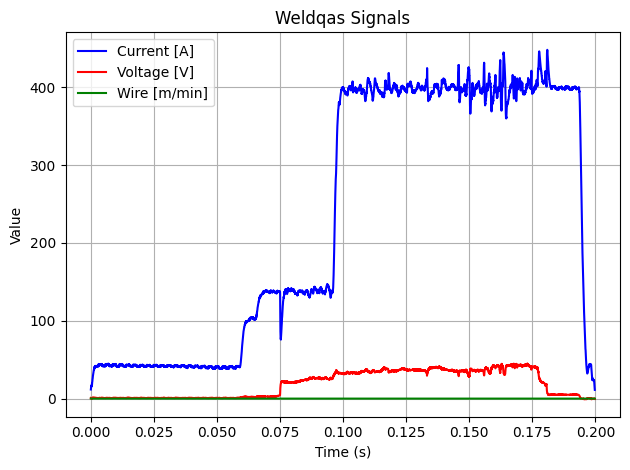

In [31]:
# read single file

file_path = os.path.join(Weldqas_path,"169.csv")
df = pd.read_csv(file_path)
#pd.set_option('display.max_rows', None)
#pd.reset_option('display.max_rows')
print(df)
df.info()
"""
plt.figure(1)
x = df["Time [s]"]
y = df["Current [A]"]
plt.plot(x,y)
plt.xlabel("Time (s)")
plt.ylabel("Current (A)")
plt.figure(2)
x = df["Time [s]"]
y = df["Voltage [V]"]
plt.plot(x,y)
plt.xlabel("Time (s)")
plt.ylabel("Voltage (V)")
plt.figure(3)
x = df["Time [s]"]
y = df["Wire [m/min]"]
plt.plot(x,y)
plt.xlabel("Time (s)")
plt.ylabel("Wire (m/min)")
"""
plt.plot(df["Time [s]"], df["Current [A]"], label="Current [A]", color="blue")
plt.plot(df["Time [s]"], df["Voltage [V]"], label="Voltage [V]", color="red")
plt.plot(df["Time [s]"], df["Wire [m/min]"], label="Wire [m/min]", color="green")

plt.xlabel("Time (s)")
plt.ylabel("Value")
plt.title("Weldqas Signals")
plt.legend()  
plt.grid(True)
plt.tight_layout()
plt.show()




对单个weldqas做STFT

In [32]:
from scipy.signal import stft

file_path = "/Users/macbook/Desktop/TUM/kecheng/KIGp/02_Data/02_Weldqas/318.csv"

df = pd.read_csv(file_path)

t = df["Time [s]"]
current = df["Current [A]"]
voltage = df['Voltage [V]']

fs = 1 / (t[1] - t[0])

f_c, t_c, Zxx_c = stft(current, fs, nperseg=256)
f_v, t_v, Zxx_v = stft(voltage, fs, nperseg=256)

Zxx_magnitude = np.abs(Zxx)  #Amplitude spectrum

# 电流子图
plt.subplot(2, 1, 1)
plt.pcolormesh(t_c, f_c, 20 * np.log10(np.abs(Zxx_c)), shading='gouraud', cmap='inferno')
plt.colorbar(label='Magnitude (dB)')
plt.title('STFT Magnitude Spectrogram (Current)')
plt.ylabel('Frequency [Hz]')
plt.ylim(0, 700)

# 电压子图
plt.subplot(2, 1, 2)
plt.pcolormesh(t_v, f_v, 20 * np.log10(np.abs(Zxx_v)), shading='gouraud', cmap='viridis')
plt.colorbar(label='Magnitude (dB)')
plt.title('STFT Magnitude Spectrogram (Voltage)')
plt.xlabel('Time [s]')
plt.ylabel('Frequency [Hz]')
plt.ylim(0, 700)

std_current = np.std(current_stable)
std_voltage = np.std(voltage_stable)

print(f"Standard Deviation of Current: {std_current:.2f} A")
print(f"Standard Deviation of Voltage: {std_voltage:.2f} V")

plt.tight_layout()
plt.show()

NameError: name 'Zxx' is not defined

对所有csv做STFT处理，并保存图像

In [34]:
import shutil
from scipy.signal import stft

csv_folder = "/Users/macbook/Desktop/TUM/kecheng/KIGp/02_Data/02_Weldqas"         # CSV 文件夹路径
img_folder = "spectrogram_images"  # 临时保存图像的文件夹
output_dir = "data"              # 最终 ImageFolder 文件夹

good_dir = os.path.join(output_dir, "good")
bad_dir = os.path.join(output_dir, "bad")

# 自动创建文件夹
os.makedirs(img_folder, exist_ok=True)
os.makedirs(good_dir, exist_ok=True)
os.makedirs(bad_dir, exist_ok=True)

for csv_file in os.listdir(csv_folder):
    if csv_file.endswith(".csv"):
        file_path = os.path.join(csv_folder, csv_file)

        # 读取 CSV
        df = pd.read_csv(file_path)
        current = df['Current [A]'].values
        voltage = df['Voltage [V]'].values
        time = df['Time [s]'].values

        fs = 1 / (time[1] - time[0])

        # 计算电流 STFT
        f_c, t_c, Zxx_c = stft(current, fs=fs, nperseg=256)
        mag_c = 20 * np.log10(np.abs(Zxx_c) + 1e-6)

        # 计算电压 STFT
        f_v, t_v, Zxx_v = stft(voltage, fs=fs, nperseg=256)
        mag_v = 20 * np.log10(np.abs(Zxx_v) + 1e-6)

        plt.figure(figsize=(6, 6))

        # 电流子图
        plt.subplot(2, 1, 1)
        plt.pcolormesh(t_c, f_c, mag_c, shading='gouraud', cmap='inferno')
        plt.axis('off')
        plt.title('Current STFT', fontsize=10)

        # 电压子图
        plt.subplot(2, 1, 2)
        plt.pcolormesh(t_v, f_v, mag_v, shading='gouraud', cmap='viridis')
        plt.axis('off')
        plt.title('Voltage STFT', fontsize=10)

        plt.tight_layout()

        # 保存图像
        img_name = csv_file.replace(".csv", ".png")
        img_path = os.path.join(img_folder, img_name)
        plt.savefig(img_path, bbox_inches='tight', pad_inches=0)
        plt.close()

        # 选择稳态段，比如后 50%
        stable_start = int(len(current) * 0.5)
        current_stable = current[stable_start:]
        voltage_stable = voltage[stable_start:]
        # 计算稳态标准差
        std_current = np.std(current_stable)
        std_voltage = np.std(voltage_stable)
        print(f"Processing {csv_file}: Std Current = {std_current:.2f}, Std Voltage = {std_voltage:.2f}")
        # 示例条件：电流标准差 < 75 且电压标准差 < 14 认为 good
        if std_current < 75 and std_voltage < 14:
            target_dir = good_dir
        else:
            target_dir = bad_dir

        shutil.copy(img_path, os.path.join(target_dir, img_name))


Processing 223.csv: Std Current = 70.06, Std Voltage = 12.77
Processing 237.csv: Std Current = 71.69, Std Voltage = 12.90
Processing 169.csv: Std Current = 76.50, Std Voltage = 13.68
Processing 196.csv: Std Current = 68.45, Std Voltage = 12.73
Processing 182.csv: Std Current = 74.88, Std Voltage = 12.91
Processing 357.csv: Std Current = 77.01, Std Voltage = 14.04
Processing 343.csv: Std Current = 73.48, Std Voltage = 11.33
Processing 425.csv: Std Current = 77.86, Std Voltage = 13.83
Processing 419.csv: Std Current = 72.55, Std Voltage = 9.84
Processing 394.csv: Std Current = 76.03, Std Voltage = 12.95
Processing 380.csv: Std Current = 74.28, Std Voltage = 14.24
Processing 381.csv: Std Current = 68.28, Std Voltage = 14.53
Processing 395.csv: Std Current = 72.43, Std Voltage = 13.92
Processing 418.csv: Std Current = 73.86, Std Voltage = 12.65
Processing 342.csv: Std Current = 71.87, Std Voltage = 14.26
Processing 424.csv: Std Current = 70.89, Std Voltage = 17.30
Processing 356.csv: Std C

转换图像格式

In [35]:
%pip install opencv-python
%pip install seaborn

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


CNN模型1

In [37]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import numpy as np
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
from PIL import Image
import os
import cv2
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

class STFTImageDataset(Dataset):
    """
    用于处理已有STFT图像的数据集类
    """
    def __init__(self, image_paths, labels, transform=None, image_size=(224, 224)):
        """
        Args:
            image_paths: 图像路径列表
            labels: 标签列表 (0: good, 1: bad)
            transform: 图像变换
            image_size: 图像尺寸
        """
        self.image_paths = image_paths
        self.labels = labels
        self.transform = transform
        self.image_size = image_size
        
        # 如果没有指定transform，使用默认的
        if self.transform is None:
            self.transform = transforms.Compose([
                transforms.Resize(image_size),
                transforms.ToTensor(),
                transforms.Normalize(mean=[0.485, 0.456, 0.406], 
                                   std=[0.229, 0.224, 0.225])
            ])
    
    def __len__(self):
        return len(self.image_paths)
    
    def __getitem__(self, idx):
        # 读取图像
        image_path = self.image_paths[idx]
        image = Image.open(image_path).convert('RGB')
        
        # 将图像分割为上半部分（电流）和下半部分（电压）
        width, height = image.size
        current_image = image.crop((0, 0, width, height//2))  # 上半部分 - 电流
        voltage_image = image.crop((0, height//2, width, height))  # 下半部分 - 电压
        
        # 应用变换
        if self.transform:
            current_image = self.transform(current_image)
            voltage_image = self.transform(voltage_image)
        
        label = self.labels[idx]
        return current_image, voltage_image, label

class STFTImageDatasetFromFolder(Dataset):
    """
    从文件夹结构读取STFT图像的数据集类
    文件夹结构应该是：
    dataset/
    ├── good/
    │   ├── image1.png
    │   ├── image2.png
    │   └── ...
    └── bad/
        ├── image1.png
        ├── image2.png
        └── ...
    """
    def __init__(self, data_dir, transform=None, image_size=(224, 224)):
        self.data_dir = data_dir
        self.image_size = image_size
        self.image_paths = []
        self.labels = []
        
        # 读取good类别的图像
        good_dir = os.path.join(data_dir, 'good')
        if os.path.exists(good_dir):
            for img_name in os.listdir(good_dir):
                if img_name.lower().endswith(('.png', '.jpg', '.jpeg')) and not img_name.startswith('.'):
                    self.image_paths.append(os.path.join(good_dir, img_name))
                    self.labels.append(0)  # good = 0
        
        # 读取bad类别的图像
        bad_dir = os.path.join(data_dir, 'bad')
        if os.path.exists(bad_dir):
            for img_name in os.listdir(bad_dir):
                if img_name.lower().endswith(('.png', '.jpg', '.jpeg')) and not img_name.startswith('.'):
                    self.image_paths.append(os.path.join(bad_dir, img_name))
                    self.labels.append(1)  # bad = 1
        
        # 默认变换
        if transform is None:
            self.transform = transforms.Compose([
                transforms.Resize(image_size),
                transforms.ToTensor(),
                transforms.Normalize(mean=[0.485, 0.456, 0.406], 
                                   std=[0.229, 0.224, 0.225])
            ])
        else:
            self.transform = transform
    
    def __len__(self):
        return len(self.image_paths)
    
    def __getitem__(self, idx):
        image_path = self.image_paths[idx]
        image = Image.open(image_path).convert('RGB')
        
        # 将图像分割为上半部分（电流）和下半部分（电压）
        width, height = image.size
        current_image = image.crop((0, 0, width, height//2))  # 上半部分 - 电流
        voltage_image = image.crop((0, height//2, width, height))  # 下半部分 - 电压
        
        if self.transform:
            current_image = self.transform(current_image)
            voltage_image = self.transform(voltage_image)
        
        label = self.labels[idx]
        return current_image, voltage_image, label

class SpatialAttention(nn.Module):
    """
    空间注意力模块，关注图像中的重要区域
    """
    def __init__(self, kernel_size=7):
        super(SpatialAttention, self).__init__()
        self.conv = nn.Conv2d(2, 1, kernel_size=kernel_size, padding=kernel_size//2, bias=False)
        self.sigmoid = nn.Sigmoid()
    
    def forward(self, x):
        avg_out = torch.mean(x, dim=1, keepdim=True)
        max_out, _ = torch.max(x, dim=1, keepdim=True)
        x_cat = torch.cat([avg_out, max_out], dim=1)
        attention = self.sigmoid(self.conv(x_cat))
        return x * attention

class ChannelAttention(nn.Module):
    """
    通道注意力模块，关注重要的特征通道
    """
    def __init__(self, in_channels, reduction=16):
        super(ChannelAttention, self).__init__()
        self.avg_pool = nn.AdaptiveAvgPool2d(1)
        self.max_pool = nn.AdaptiveMaxPool2d(1)
        
        self.fc = nn.Sequential(
            nn.Linear(in_channels, in_channels // reduction, bias=False),
            nn.ReLU(inplace=True),
            nn.Linear(in_channels // reduction, in_channels, bias=False),
            nn.Sigmoid()
        )
    
    def forward(self, x):
        b, c, _, _ = x.size()
        
        avg_out = self.fc(self.avg_pool(x).view(b, c))
        max_out = self.fc(self.max_pool(x).view(b, c))
        
        attention = (avg_out + max_out).view(b, c, 1, 1)
        return x * attention

class CBAM(nn.Module):
    """
    卷积块注意力模块 (Convolutional Block Attention Module)
    """
    def __init__(self, in_channels, reduction=16):
        super(CBAM, self).__init__()
        self.channel_attention = ChannelAttention(in_channels, reduction)
        self.spatial_attention = SpatialAttention()
    
    def forward(self, x):
        x = self.channel_attention(x)
        x = self.spatial_attention(x)
        return x

class ResidualBlock(nn.Module):
    """
    改进的残差块，加入了注意力机制
    """
    def __init__(self, in_channels, out_channels, stride=1, use_attention=True):
        super(ResidualBlock, self).__init__()
        self.conv1 = nn.Conv2d(in_channels, out_channels, kernel_size=3, stride=stride, padding=1, bias=False)
        self.bn1 = nn.BatchNorm2d(out_channels)
        self.conv2 = nn.Conv2d(out_channels, out_channels, kernel_size=3, stride=1, padding=1, bias=False)
        self.bn2 = nn.BatchNorm2d(out_channels)
        
        # 注意力机制
        self.use_attention = use_attention
        if use_attention:
            self.attention = CBAM(out_channels)
        
        # 残差连接
        self.shortcut = nn.Sequential()
        if stride != 1 or in_channels != out_channels:
            self.shortcut = nn.Sequential(
                nn.Conv2d(in_channels, out_channels, kernel_size=1, stride=stride, bias=False),
                nn.BatchNorm2d(out_channels)
            )
    
    def forward(self, x):
        out = F.relu(self.bn1(self.conv1(x)))
        out = self.bn2(self.conv2(out))
        
        if self.use_attention:
            out = self.attention(out)
        
        out += self.shortcut(x)
        out = F.relu(out)
        return out

class DualStreamSTFTClassifier(nn.Module):
    """
    双流CNN模型：分别处理电流和电压STFT图像
    """
    def __init__(self, input_channels=3, dropout_rate=0.3):
        super(DualStreamSTFTClassifier, self).__init__()
        
        # 电流分支CNN
        self.current_branch = self._make_feature_extractor(input_channels)
        
        # 电压分支CNN
        self.voltage_branch = self._make_feature_extractor(input_channels)
        
        # 特征融合层
        self.fusion_layer = nn.Sequential(
            nn.Linear(512 * 2, 1024),  # 融合两个分支的特征
            nn.ReLU(inplace=True),
            nn.Dropout(dropout_rate),
            nn.Linear(1024, 512),
            nn.ReLU(inplace=True),
            nn.Dropout(dropout_rate)
        )
        
        # 最终分类层
        self.classifier = nn.Sequential(
            nn.Linear(512, 256),
            nn.ReLU(inplace=True),
            nn.Dropout(dropout_rate),
            nn.Linear(256, 64),
            nn.ReLU(inplace=True),
            nn.Dropout(dropout_rate),
            nn.Linear(64, 2)  # 二分类
        )
        
        # 权重初始化
        self._initialize_weights()
    
    def _make_feature_extractor(self, input_channels):
        """
        创建特征提取器（单个分支）
        """
        return nn.Sequential(
            # 第一个卷积块
            nn.Conv2d(input_channels, 64, kernel_size=7, stride=2, padding=3, bias=False),
            nn.BatchNorm2d(64),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=3, stride=2, padding=1),
            
            # 残差块组
            self._make_layer(64, 64, 2, stride=1),
            self._make_layer(64, 128, 2, stride=2),
            self._make_layer(128, 256, 2, stride=2),
            self._make_layer(256, 512, 2, stride=2),
            
            # 全局平均池化
            nn.AdaptiveAvgPool2d((1, 1))
        )
    
    def _make_layer(self, in_channels, out_channels, num_blocks, stride):
        layers = []
        layers.append(ResidualBlock(in_channels, out_channels, stride))
        for _ in range(1, num_blocks):
            layers.append(ResidualBlock(out_channels, out_channels))
        return nn.Sequential(*layers)
    
    def _initialize_weights(self):
        for m in self.modules():
            if isinstance(m, nn.Conv2d):
                nn.init.kaiming_normal_(m.weight, mode='fan_out', nonlinearity='relu')
            elif isinstance(m, nn.BatchNorm2d):
                nn.init.constant_(m.weight, 1)
                nn.init.constant_(m.bias, 0)
            elif isinstance(m, nn.Linear):
                nn.init.normal_(m.weight, 0, 0.01)
                nn.init.constant_(m.bias, 0)
    
    def forward(self, current_image, voltage_image):
        # 电流分支特征提取
        current_features = self.current_branch(current_image)
        current_features = torch.flatten(current_features, 1)
        
        # 电压分支特征提取
        voltage_features = self.voltage_branch(voltage_image)
        voltage_features = torch.flatten(voltage_features, 1)
        
        # 特征融合
        fused_features = torch.cat([current_features, voltage_features], dim=1)
        fused_features = self.fusion_layer(fused_features)
        
        # 分类
        output = self.classifier(fused_features)
        
        return output

class STFTBinaryClassifier(nn.Module):
    """
    保留原来的单流模型作为备选
    """
    def __init__(self, input_channels=3, dropout_rate=0.5):
        super(STFTBinaryClassifier, self).__init__()
        
        # 初始卷积层
        self.conv1 = nn.Conv2d(input_channels, 64, kernel_size=7, stride=2, padding=3, bias=False)
        self.bn1 = nn.BatchNorm2d(64)
        self.maxpool = nn.MaxPool2d(kernel_size=3, stride=2, padding=1)
        
        # 残差块组
        self.layer1 = self._make_layer(64, 64, 2, stride=1)
        self.layer2 = self._make_layer(64, 128, 2, stride=2)
        self.layer3 = self._make_layer(128, 256, 2, stride=2)
        self.layer4 = self._make_layer(256, 512, 2, stride=2)
        
        # 全局平均池化
        self.global_avg_pool = nn.AdaptiveAvgPool2d((1, 1))
        
        # 分类头
        self.classifier = nn.Sequential(
            nn.Dropout(dropout_rate),
            nn.Linear(512, 256),
            nn.ReLU(inplace=True),
            nn.Dropout(dropout_rate),
            nn.Linear(256, 64),
            nn.ReLU(inplace=True),
            nn.Dropout(dropout_rate),
            nn.Linear(64, 2)  # 二分类：good vs bad
        )
        
        # 权重初始化
        self._initialize_weights()
    
    def _make_layer(self, in_channels, out_channels, num_blocks, stride):
        layers = []
        layers.append(ResidualBlock(in_channels, out_channels, stride))
        for _ in range(1, num_blocks):
            layers.append(ResidualBlock(out_channels, out_channels))
        return nn.Sequential(*layers)
    
    def _initialize_weights(self):
        for m in self.modules():
            if isinstance(m, nn.Conv2d):
                nn.init.kaiming_normal_(m.weight, mode='fan_out', nonlinearity='relu')
            elif isinstance(m, nn.BatchNorm2d):
                nn.init.constant_(m.weight, 1)
                nn.init.constant_(m.bias, 0)
            elif isinstance(m, nn.Linear):
                nn.init.normal_(m.weight, 0, 0.01)
                nn.init.constant_(m.bias, 0)
    
    def forward(self, x):
        # 特征提取
        x = F.relu(self.bn1(self.conv1(x)))
        x = self.maxpool(x)
        
        x = self.layer1(x)
        x = self.layer2(x)
        x = self.layer3(x)
        x = self.layer4(x)
        
        # 全局平均池化
        x = self.global_avg_pool(x)
        x = torch.flatten(x, 1)
        
        # 分类
        x = self.classifier(x)
        
        return x

class FocalLoss(nn.Module):
    """
    Focal Loss用于处理类别不平衡问题
    """
    def __init__(self, alpha=1, gamma=2, reduction='mean'):
        super(FocalLoss, self).__init__()
        self.alpha = alpha
        self.gamma = gamma
        self.reduction = reduction
    
    def forward(self, inputs, targets):
        ce_loss = F.cross_entropy(inputs, targets, reduction='none')
        pt = torch.exp(-ce_loss)
        focal_loss = self.alpha * (1-pt)**self.gamma * ce_loss
        
        if self.reduction == 'mean':
            return focal_loss.mean()
        elif self.reduction == 'sum':
            return focal_loss.sum()
        else:
            return focal_loss

class DualStreamTrainer:
    """
    双流CNN训练器
    """
    def __init__(self, model, device='cuda' if torch.cuda.is_available() else 'cpu', 
                 use_focal_loss=False, focal_alpha=1, focal_gamma=2):
        self.model = model.to(device)
        self.device = device
        
        # 选择损失函数
        if use_focal_loss:
            self.criterion = FocalLoss(alpha=focal_alpha, gamma=focal_gamma)
        else:
            self.criterion = nn.CrossEntropyLoss()
        
        # 优化器
        self.optimizer = torch.optim.Adam(model.parameters(), lr=0.001, weight_decay=1e-4)
        self.scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(
            self.optimizer, mode='min', factor=0.5, patience=5, verbose=True
        )
        
        # 训练历史
        self.train_losses = []
        self.val_losses = []
        self.train_accuracies = []
        self.val_accuracies = []
    
    def train_epoch(self, train_loader):
        self.model.train()
        total_loss = 0
        correct = 0
        total = 0
        
        for batch_idx, (current_data, voltage_data, target) in enumerate(train_loader):
            current_data = current_data.to(self.device)
            voltage_data = voltage_data.to(self.device)
            target = target.to(self.device)
            
            self.optimizer.zero_grad()
            output = self.model(current_data, voltage_data)
            loss = self.criterion(output, target)
            loss.backward()
            self.optimizer.step()
            
            total_loss += loss.item()
            _, predicted = output.max(1)
            total += target.size(0)
            correct += predicted.eq(target).sum().item()
        
        accuracy = 100. * correct / total
        avg_loss = total_loss / len(train_loader)
        
        self.train_losses.append(avg_loss)
        self.train_accuracies.append(accuracy)
        
        return avg_loss, accuracy
    
    def validate(self, val_loader):
        self.model.eval()
        total_loss = 0
        correct = 0
        total = 0
        all_predictions = []
        all_targets = []
        
        with torch.no_grad():
            for current_data, voltage_data, target in val_loader:
                current_data = current_data.to(self.device)
                voltage_data = voltage_data.to(self.device)
                target = target.to(self.device)
                
                output = self.model(current_data, voltage_data)
                loss = self.criterion(output, target)
                
                total_loss += loss.item()
                _, predicted = output.max(1)
                total += target.size(0)
                correct += predicted.eq(target).sum().item()
                
                all_predictions.extend(predicted.cpu().numpy())
                all_targets.extend(target.cpu().numpy())
        
        accuracy = 100. * correct / total
        avg_loss = total_loss / len(val_loader)
        
        self.val_losses.append(avg_loss)
        self.val_accuracies.append(accuracy)
        
        return avg_loss, accuracy, all_predictions, all_targets
    
    def train(self, train_loader, val_loader, epochs=50, save_best=True):
        best_val_acc = 0
        best_model_state = None
        
        print("开始训练双流CNN模型...")
        print(f"设备: {self.device}")
        print(f"训练样本数: {len(train_loader.dataset)}")
        print(f"验证样本数: {len(val_loader.dataset)}")
        print("-" * 60)
        
        for epoch in range(epochs):
            # 训练
            train_loss, train_acc = self.train_epoch(train_loader)
            
            # 验证
            val_loss, val_acc, val_predictions, val_targets = self.validate(val_loader)
            
            # 更新学习率
            self.scheduler.step(val_loss)
            
            # 打印结果
            print(f'Epoch [{epoch+1}/{epochs}]')
            print(f'Train Loss: {train_loss:.4f}, Train Acc: {train_acc:.2f}%')
            print(f'Val Loss: {val_loss:.4f}, Val Acc: {val_acc:.2f}%')
            print(f'Learning Rate: {self.optimizer.param_groups[0]["lr"]:.6f}')
            print('-' * 60)
            
            # 保存最佳模型
            if save_best and val_acc > best_val_acc:
                best_val_acc = val_acc
                best_model_state = self.model.state_dict().copy()
                torch.save(best_model_state, 'best_dual_stream_stft_classifier.pth')
                print(f'新的最佳模型已保存！验证精度: {best_val_acc:.2f}%')
        
        print(f'\n训练完成！最佳验证精度: {best_val_acc:.2f}%')
        
        # 加载最佳模型
        if save_best and best_model_state:
            self.model.load_state_dict(best_model_state)
        
        return best_val_acc
    
    def plot_training_history(self):
        """绘制训练历史"""
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
        
        # 损失曲线
        ax1.plot(self.train_losses, label='Training Loss')
        ax1.plot(self.val_losses, label='Validation Loss')
        ax1.set_title('Dual Stream Training and Validation Loss')
        ax1.set_xlabel('Epoch')
        ax1.set_ylabel('Loss')
        ax1.legend()
        ax1.grid(True)
        
        # 准确率曲线
        ax2.plot(self.train_accuracies, label='Training Accuracy')
        ax2.plot(self.val_accuracies, label='Validation Accuracy')
        ax2.set_title('Dual Stream Training and Validation Accuracy')
        ax2.set_xlabel('Epoch')
        ax2.set_ylabel('Accuracy (%)')
        ax2.legend()
        ax2.grid(True)
        
        plt.tight_layout()
        plt.savefig('dual_stream_training_history.png', dpi=300, bbox_inches='tight')
        plt.show()
    
    def evaluate_model(self, test_loader, class_names=['Good', 'Bad']):
        """评估模型性能"""
        self.model.eval()
        all_predictions = []
        all_targets = []
        
        with torch.no_grad():
            for current_data, voltage_data, target in test_loader:
                current_data = current_data.to(self.device)
                voltage_data = voltage_data.to(self.device)
                target = target.to(self.device)
                
                output = self.model(current_data, voltage_data)
                _, predicted = output.max(1)
                
                all_predictions.extend(predicted.cpu().numpy())
                all_targets.extend(target.cpu().numpy())
        
        # 分类报告
        print("\n双流CNN分类报告:")
        print(classification_report(all_targets, all_predictions, target_names=class_names))
        
        # 混淆矩阵
        cm = confusion_matrix(all_targets, all_predictions)
        plt.figure(figsize=(8, 6))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                    xticklabels=class_names, yticklabels=class_names)
        plt.title('Dual Stream CNN Confusion Matrix')
        plt.ylabel('True Label')
        plt.xlabel('Predicted Label')
        plt.savefig('dual_stream_confusion_matrix.png', dpi=300, bbox_inches='tight')
        plt.show()
        
        return all_predictions, all_targets
class STFTBinaryTrainer:
    """
    原始单流CNN训练器（保留作为备选）
    """
    def __init__(self, model, device='cuda' if torch.cuda.is_available() else 'cpu', 
                 use_focal_loss=False, focal_alpha=1, focal_gamma=2):
        self.model = model.to(device)
        self.device = device
        
        # 选择损失函数
        if use_focal_loss:
            self.criterion = FocalLoss(alpha=focal_alpha, gamma=focal_gamma)
        else:
            self.criterion = nn.CrossEntropyLoss()
        
        # 优化器
        self.optimizer = torch.optim.Adam(model.parameters(), lr=0.001, weight_decay=1e-4)
        self.scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(
            self.optimizer, mode='min', factor=0.5, patience=5, verbose=True
        )
        
        # 训练历史
        self.train_losses = []
        self.val_losses = []
        self.train_accuracies = []
        self.val_accuracies = []
    
    def train_epoch(self, train_loader):
        self.model.train()
        total_loss = 0
        correct = 0
        total = 0
        
        for batch_idx, (data, target) in enumerate(train_loader):
            data, target = data.to(self.device), target.to(self.device)
            
            self.optimizer.zero_grad()
            output = self.model(data)
            loss = self.criterion(output, target)
            loss.backward()
            self.optimizer.step()
            
            total_loss += loss.item()
            _, predicted = output.max(1)
            total += target.size(0)
            correct += predicted.eq(target).sum().item()
        
        accuracy = 100. * correct / total
        avg_loss = total_loss / len(train_loader)
        
        self.train_losses.append(avg_loss)
        self.train_accuracies.append(accuracy)
        
        return avg_loss, accuracy
    
    def validate(self, val_loader):
        self.model.eval()
        total_loss = 0
        correct = 0
        total = 0
        all_predictions = []
        all_targets = []
        
        with torch.no_grad():
            for data, target in val_loader:
                data, target = data.to(self.device), target.to(self.device)
                output = self.model(data)
                loss = self.criterion(output, target)
                
                total_loss += loss.item()
                _, predicted = output.max(1)
                total += target.size(0)
                correct += predicted.eq(target).sum().item()
                
                all_predictions.extend(predicted.cpu().numpy())
                all_targets.extend(target.cpu().numpy())
        
        accuracy = 100. * correct / total
        avg_loss = total_loss / len(val_loader)
        
        self.val_losses.append(avg_loss)
        self.val_accuracies.append(accuracy)
        
        return avg_loss, accuracy, all_predictions, all_targets
    
    def train(self, train_loader, val_loader, epochs=50, save_best=True):
        best_val_acc = 0
        best_model_state = None
        
        print("开始训练...")
        print(f"设备: {self.device}")
        print(f"训练样本数: {len(train_loader.dataset)}")
        print(f"验证样本数: {len(val_loader.dataset)}")
        print("-" * 60)
        
        for epoch in range(epochs):
            # 训练
            train_loss, train_acc = self.train_epoch(train_loader)
            
            # 验证
            val_loss, val_acc, val_predictions, val_targets = self.validate(val_loader)
            
            # 更新学习率
            self.scheduler.step(val_loss)
            
            # 打印结果
            print(f'Epoch [{epoch+1}/{epochs}]')
            print(f'Train Loss: {train_loss:.4f}, Train Acc: {train_acc:.2f}%')
            print(f'Val Loss: {val_loss:.4f}, Val Acc: {val_acc:.2f}%')
            print(f'Learning Rate: {self.optimizer.param_groups[0]["lr"]:.6f}')
            print('-' * 60)
            
            # 保存最佳模型
            if save_best and val_acc > best_val_acc:
                best_val_acc = val_acc
                best_model_state = self.model.state_dict().copy()
                torch.save(best_model_state, 'best_stft_binary_classifier.pth')
                print(f'新的最佳模型已保存！验证精度: {best_val_acc:.2f}%')
        
        print(f'\n训练完成！最佳验证精度: {best_val_acc:.2f}%')
        
        # 加载最佳模型
        if save_best and best_model_state:
            self.model.load_state_dict(best_model_state)
        
        return best_val_acc
    
    def plot_training_history(self):
        """绘制训练历史"""
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
        
        # 损失曲线
        ax1.plot(self.train_losses, label='Training Loss')
        ax1.plot(self.val_losses, label='Validation Loss')
        ax1.set_title('Training and Validation Loss')
        ax1.set_xlabel('Epoch')
        ax1.set_ylabel('Loss')
        ax1.legend()
        ax1.grid(True)
        
        # 准确率曲线
        ax2.plot(self.train_accuracies, label='Training Accuracy')
        ax2.plot(self.val_accuracies, label='Validation Accuracy')
        ax2.set_title('Training and Validation Accuracy')
        ax2.set_xlabel('Epoch')
        ax2.set_ylabel('Accuracy (%)')
        ax2.legend()
        ax2.grid(True)
        
        plt.tight_layout()
        plt.savefig('training_history.png', dpi=300, bbox_inches='tight')
        plt.show()
    
    def evaluate_model(self, test_loader, class_names=['Good', 'Bad']):
        """评估模型性能"""
        self.model.eval()
        all_predictions = []
        all_targets = []
        
        with torch.no_grad():
            for data, target in test_loader:
                data, target = data.to(self.device), target.to(self.device)
                output = self.model(data)
                _, predicted = output.max(1)
                
                all_predictions.extend(predicted.cpu().numpy())
                all_targets.extend(target.cpu().numpy())
        
        # 分类报告
        print("\n分类报告:")
        print(classification_report(all_targets, all_predictions, target_names=class_names))
        
        # 混淆矩阵
        cm = confusion_matrix(all_targets, all_predictions)
        plt.figure(figsize=(8, 6))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                    xticklabels=class_names, yticklabels=class_names)
        plt.title('Confusion Matrix')
        plt.ylabel('True Label')
        plt.xlabel('Predicted Label')
        plt.savefig('confusion_matrix.png', dpi=300, bbox_inches='tight')
        plt.show()
        
        return all_predictions, all_targets

def create_data_transforms(image_size=(128, 256), augment=True):
    """
    创建数据变换 - 针对分割后的电流/电压STFT图像优化
    """
    if augment:
        # 训练时的数据增强 - 针对频谱图特点调整
        train_transform = transforms.Compose([
            transforms.Resize(image_size),  # 分割后的图像尺寸
            # 频谱图通常不需要水平翻转，因为会改变频率特性
            transforms.RandomRotation(degrees=3),  # 减少旋转角度
            # 对频谱图进行轻微的颜色调整
            transforms.ColorJitter(brightness=0.1, contrast=0.1, saturation=0.1),
            transforms.ToTensor(),
            # 针对频谱图的归一化参数
            transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])
        ])
        
        # 验证/测试时的变换
        val_transform = transforms.Compose([
            transforms.Resize(image_size),
            transforms.ToTensor(),
            transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])
        ])
        
        return train_transform, val_transform
    else:
        # 简单变换
        transform = transforms.Compose([
            transforms.Resize(image_size),
            transforms.ToTensor(),
            transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])
        ])
        return transform

def preview_dual_stream_data(dataset, num_samples=4):
    """
    预览双流数据集中的样本（电流和电压分开显示）
    """
    fig, axes = plt.subplots(3, num_samples, figsize=(20, 12))
    
    # 临时移除归一化以便显示
    original_transform = dataset.transform
    preview_transform = transforms.Compose([
        transforms.Resize((128, 256)),  # 调整尺寸适合分割后的图像
        transforms.ToTensor()
    ])
    dataset.transform = preview_transform
    
    for i in range(min(num_samples, len(dataset))):
        current_image, voltage_image, label = dataset[i]
        
        # 转换为numpy并调整维度用于显示
        current_np = current_image.permute(1, 2, 0).numpy()
        voltage_np = voltage_image.permute(1, 2, 0).numpy()
        
        # 显示电流图像
        axes[0, i].imshow(current_np)
        axes[0, i].set_title(f'Current - {"Good" if label == 0 else "Bad"}')
        axes[0, i].axis('off')
        
        # 显示电压图像
        axes[1, i].imshow(voltage_np)
        axes[1, i].set_title(f'Voltage - {"Good" if label == 0 else "Bad"}')
        axes[1, i].axis('off')
        
        # 显示组合图像（用于对比）
        combined = np.vstack([current_np, voltage_np])
        axes[2, i].imshow(combined)
        axes[2, i].set_title(f'Combined - Label: {label}')
        axes[2, i].axis('off')
    
    # 设置行标签
    axes[0, 0].set_ylabel('Current STFT', rotation=90, fontsize=12)
    axes[1, 0].set_ylabel('Voltage STFT', rotation=90, fontsize=12)
    axes[2, 0].set_ylabel('Combined', rotation=90, fontsize=12)
    
    # 恢复原始变换
    dataset.transform = original_transform
    
    plt.tight_layout()
    plt.savefig('dual_stream_data_preview.png', dpi=300, bbox_inches='tight')
    plt.show()
    
    print(f"双流数据预览已保存为 dual_stream_data_preview.png")

def main():
    """
    主函数 - 演示使用方法
    """
    # 设置参数
    data_dir = "/Users/macbook/Desktop/TUM/kecheng/KIGp/Data"
    image_size = (256, 256)  # 适合频谱图的尺寸
    batch_size = 16  # 根据您的数据量调整
    epochs = 100
    
    # 检查数据路径
    if not os.path.exists(data_dir):
        print(f"错误：数据路径不存在 {data_dir}")
        return
    
    good_dir = os.path.join(data_dir, "good")
    bad_dir = os.path.join(data_dir, "bad")
    
    if not os.path.exists(good_dir) or not os.path.exists(bad_dir):
        print(f"错误：good或bad文件夹不存在")
        print(f"Good路径: {good_dir}")
        print(f"Bad路径: {bad_dir}")
        return
    
    # 统计图像数量
    good_images = [f for f in os.listdir(good_dir) if f.lower().endswith(('.png', '.jpg', '.jpeg')) and not f.startswith('.')]
    bad_images = [f for f in os.listdir(bad_dir) if f.lower().endswith(('.png', '.jpg', '.jpeg')) and not f.startswith('.')]
    
    print(f"数据统计:")
    print(f"Good图像数量: {len(good_images)}")
    print(f"Bad图像数量: {len(bad_images)}")
    print(f"总图像数量: {len(good_images) + len(bad_images)}")
    print(f"类别平衡度: Good {len(good_images)/(len(good_images)+len(bad_images))*100:.1f}%, Bad {len(bad_images)/(len(good_images)+len(bad_images))*100:.1f}%")
    print("-" * 60)
    
    # 创建数据变换
    train_transform, val_transform = create_data_transforms(image_size, augment=True)
    
    # 创建数据集（从文件夹结构）
    full_dataset = STFTImageDatasetFromFolder(data_dir, transform=None)  # 先不应用变换
    
    if len(full_dataset) == 0:
        print("错误：没有找到任何图像文件！")
        return
    
    print(f"成功加载 {len(full_dataset)} 张图像")
    
    # 数据分割
    train_size = int(0.8 * len(full_dataset))
    val_size = len(full_dataset) - train_size
    train_dataset, val_dataset = torch.utils.data.random_split(
        full_dataset, [train_size, val_size], 
        generator=torch.Generator().manual_seed(42)  # 固定随机种子
    )
    
    print(f"训练集: {len(train_dataset)} 张图像")
    print(f"验证集: {len(val_dataset)} 张图像")
    
    # 预览数据
    print("\n预览数据样本...")
    preview_data(full_dataset, num_samples=4)
    
    # 为训练集和验证集分别设置变换
    train_dataset.dataset.transform = train_transform
    val_dataset.dataset.transform = val_transform
    
    # 创建数据加载器
    train_loader = DataLoader(
        train_dataset, 
        batch_size=batch_size, 
        shuffle=True, 
        num_workers=2,  # Mac上建议使用较少的worker
        pin_memory=True
    )
    val_loader = DataLoader(
        val_dataset, 
        batch_size=batch_size, 
        shuffle=False, 
        num_workers=2,
        pin_memory=True
    )
    
    # 创建模型 - 针对您的数据调整
    model = STFTBinaryClassifier(input_channels=3, dropout_rate=0.3)  # 降低dropout
    
    # 创建训练器 - 根据数据平衡情况选择损失函数
    if abs(len(good_images) - len(bad_images)) > min(len(good_images), len(bad_images)) * 0.3:
        # 如果类别不平衡超过30%，使用Focal Loss
        print("检测到类别不平衡，使用Focal Loss")
        trainer = STFTBinaryTrainer(model, use_focal_loss=True, focal_alpha=1, focal_gamma=2)
    else:
        print("类别相对平衡，使用标准交叉熵损失")
        trainer = STFTBinaryTrainer(model, use_focal_loss=False)
    
    # 训练模型
    best_acc = trainer.train(train_loader, val_loader, epochs=epochs)
    
    # 绘制训练历史
    trainer.plot_training_history()
    
    # 评估模型
    trainer.evaluate_model(val_loader)
    
    print(f"\n训练完成！最佳验证精度: {best_acc:.2f}%")
    print("最佳模型已保存为: best_dual_stream_stft_classifier.pth")

if __name__ == "__main__":
    main()

数据统计:
Good图像数量: 178
Bad图像数量: 82
总图像数量: 260
类别平衡度: Good 68.5%, Bad 31.5%
------------------------------------------------------------
成功加载 260 张图像
训练集: 208 张图像
验证集: 52 张图像

预览数据样本...


NameError: name 'preview_data' is not defined

CNN模型2

In [46]:
%pip install tensorflow

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 252.5 MB 19.4 MB/s eta 0:00:01MB/s eta 0:00:16
     |████████████████████████████████| 135 kB 7.1 MB/s eta 0:00:01
     |████████████████████████████████| 2.8 MB 5.5 MB/s eta 0:00:01     |███████████████████████▌        | 2.1 MB 5.5 MB/s eta 0:00:01
     |████████████████████████████████| 25.8 MB 5.3 MB/s eta 0:00:011
     |████████████████████████████████| 418 kB 11.5 MB/s eta 0:00:01
     |████████████████████████████████| 10.6 MB 34.8 MB/s eta 0:00:01
     |████████████████████████████████| 1.4 MB 6.1 MB/s eta 0:00:01
     |████████████████████████████████| 71 kB 1.8 MB/s  eta 0:00:01
     |████████████████████████████████| 5.5 MB 19.2 MB/s eta 0:00:01
     |████████████████████████████████| 3.5 MB 10.1 MB/s eta 0:00:01
     |████████████████████████████████| 57 kB 19.4 MB/s eta 0:00:01
     |████████████████████████████████| 667 kB 15.0 MB/s eta 0:00:01
     |██████

Loading data...
Loaded 260 images with 260 labels
Image shape: (260, 224, 224, 3)
Unique classes: ['bad' 'good']
X shape: (260, 224, 224, 3)
y shape: (260,)
Class distribution: [87 87 86]
Class weights: {0: np.float64(0.9961685823754789), 1: np.float64(0.9961685823754789), 2: np.float64(1.0077519379844961)}
Advanced data preprocessing...
Training set size: 146
Validation set size: 49
Test set size: 65

=== Training Multiple Models ===

--- Training Simple CNN ---
Stage 1 training for simple_cnn...
Epoch 1/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 6s 627ms/step - accuracy: 0.2915 - loss: 1.8009 - val_accuracy: 0.3265 - val_loss: 3.5848 - learning_rate: 0.0100
Epoch 2/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 569ms/step - accuracy: 0.3770 - loss: 1.5835 - val_accuracy: 0.3265 - val_loss: 4.3266 - learning_rate: 0.0100
Epoch 3/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 567ms/step - accuracy: 0.3974 - loss: 1.3372 - val_accuracy: 0.3469 - val_loss: 1.3396 - learning_rate: 0.0100
Epoch 4/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 569ms/st

10/10 ━━━━━━━━━━━━━━━━━━━━ 4s 321ms/step - accuracy: 0.3026 - loss: 1.2211 - val_accuracy: 0.3469 - val_loss: 1.0395 - learning_rate: 0.0010
Epoch 2/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 3s 321ms/step - accuracy: 0.3740 - loss: 1.1325 - val_accuracy: 0.3469 - val_loss: 1.3445 - learning_rate: 0.0010
Epoch 3/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 3s 345ms/step - accuracy: 0.2974 - loss: 1.1357 - val_accuracy: 0.3469 - val_loss: 1.2381 - learning_rate: 0.0010
Epoch 4/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 4s 338ms/step - accuracy: 0.4401 - loss: 1.0723 - val_accuracy: 0.3469 - val_loss: 1.1486 - learning_rate: 0.0010
Epoch 5/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 3s 296ms/step - accuracy: 0.4060 - loss: 1.0713 - val_accuracy: 0.3469 - val_loss: 1.1263 - learning_rate: 0.0010
Epoch 6/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 3s 293ms/step - accuracy: 0.3696 - loss: 1.0950 - val_accuracy: 0.3469 - val_loss: 1.1192 - learning_rate: 0.0010
Epoch 7/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 3s 310ms/step - accuracy: 0.3828 - loss: 1.1484 - val_accurac

10/10 ━━━━━━━━━━━━━━━━━━━━ 3s 166ms/step - accuracy: 0.4146 - loss: 1.4425 - val_accuracy: 0.3469 - val_loss: 3.1593 - learning_rate: 0.0010
Epoch 2/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 154ms/step - accuracy: 0.3741 - loss: 1.2995 - val_accuracy: 0.3469 - val_loss: 1.3122 - learning_rate: 0.0010
Epoch 3/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 148ms/step - accuracy: 0.3707 - loss: 1.3441 - val_accuracy: 0.3469 - val_loss: 1.1878 - learning_rate: 0.0010
Epoch 4/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 146ms/step - accuracy: 0.4205 - loss: 1.2603 - val_accuracy: 0.3469 - val_loss: 1.1627 - learning_rate: 0.0010
Epoch 5/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 146ms/step - accuracy: 0.3309 - loss: 1.3325 - val_accuracy: 0.3469 - val_loss: 1.2207 - learning_rate: 0.0010
Epoch 6/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 146ms/step - accuracy: 0.4468 - loss: 1.1099 - val_accuracy: 0.3469 - val_loss: 1.2059 - learning_rate: 0.0010
Epoch 7/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 143ms/step - accuracy: 0.3760 - loss: 1.2678 - val_accurac

10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 152ms/step - accuracy: 0.3438 - loss: 1.1480 - val_accuracy: 0.6735 - val_loss: 1.0993 - learning_rate: 3.0000e-04
Epoch 15/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 158ms/step - accuracy: 0.3875 - loss: 1.2318 - val_accuracy: 0.3265 - val_loss: 1.0944 - learning_rate: 3.0000e-04
Epoch 16/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 155ms/step - accuracy: 0.3689 - loss: 1.2237 - val_accuracy: 0.3265 - val_loss: 1.0930 - learning_rate: 3.0000e-04
Epoch 17/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 151ms/step - accuracy: 0.3678 - loss: 1.1643 - val_accuracy: 0.3265 - val_loss: 1.0939 - learning_rate: 3.0000e-04
Epoch 18/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 152ms/step - accuracy: 0.3923 - loss: 1.1781 - val_accuracy: 0.3265 - val_loss: 1.0982 - learning_rate: 3.0000e-04
Epoch 19/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 153ms/step - accuracy: 0.3500 - loss: 1.1960 - val_accuracy: 0.3469 - val_loss: 1.0937 - learning_rate: 3.0000e-04
Epoch 20/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 150ms/step - accuracy: 0.437

10/10 ━━━━━━━━━━━━━━━━━━━━ 5s 231ms/step - accuracy: 0.4187 - loss: 1.6763 - val_accuracy: 0.3265 - val_loss: 22.8780 - learning_rate: 0.0010
Epoch 2/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 172ms/step - accuracy: 0.4013 - loss: 1.2791 - val_accuracy: 0.3265 - val_loss: 19.0940 - learning_rate: 0.0010
Epoch 3/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 157ms/step - accuracy: 0.3598 - loss: 1.5167 - val_accuracy: 0.3265 - val_loss: 18.2966 - learning_rate: 0.0010
Epoch 4/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 151ms/step - accuracy: 0.5048 - loss: 1.1447 - val_accuracy: 0.3265 - val_loss: 17.4785 - learning_rate: 0.0010
Epoch 5/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 152ms/step - accuracy: 0.4849 - loss: 1.3032 - val_accuracy: 0.3265 - val_loss: 18.7849 - learning_rate: 0.0010
Epoch 6/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 163ms/step - accuracy: 0.4937 - loss: 1.1657 - val_accuracy: 0.3265 - val_loss: 13.4187 - learning_rate: 0.0010
Epoch 7/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 156ms/step - accuracy: 0.5289 - loss: 1.1656 - val_a

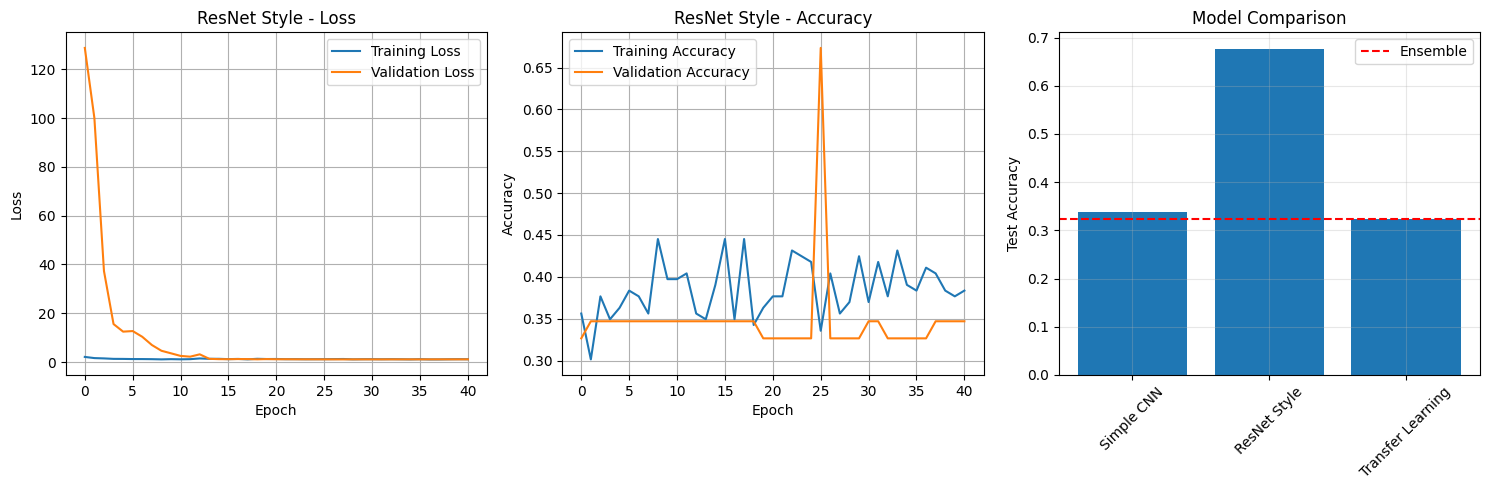


=== 最终结果分析 ===
最佳测试精度: 0.6769 (67.69%)
🔧 可以接受，但还有改进空间

=== 改进建议 ===
1. 尝试更复杂的数据增强策略
2. 调整超参数
3. 增加训练数据
4. 尝试不同的优化器


In [56]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.utils.class_weight import compute_class_weight
import os
import cv2
from pathlib import Path

# 设置GPU内存增长（避免内存问题）
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    try:
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
    except RuntimeError as e:
        print(e)

# 数据预处理类
class SpectrogramDataLoader:
    def __init__(self, data_dir, img_size=(224, 224)):
        self.data_dir = data_dir
        self.img_size = img_size
        self.images = []
        self.labels = []
        
    def load_images(self):
        """
        加载图像数据
        """
        images = []
        labels = []
        
        for class_folder in os.listdir(self.data_dir):
            class_path = os.path.join(self.data_dir, class_folder)
            if os.path.isdir(class_path):
                for img_file in os.listdir(class_path):
                    if img_file.endswith(('.png', '.jpg', '.jpeg')):
                        img_path = os.path.join(class_path, img_file)
                        try:
                            img = cv2.imread(img_path)
                            if img is not None:
                                img = cv2.resize(img, self.img_size)
                                img = img.astype(np.float32) / 255.0  # 归一化
                                
                                images.append(img)
                                labels.append(class_folder)
                        except Exception as e:
                            print(f"Error loading {img_path}: {e}")
                            continue
        
        self.images = np.array(images)
        self.labels = np.array(labels)
        
        print(f"Loaded {len(self.images)} images with {len(self.labels)} labels")
        print(f"Image shape: {self.images.shape if len(self.images) > 0 else 'No images'}")
        print(f"Unique classes: {np.unique(self.labels)}")
        
        # 确保数据一致性
        assert len(self.images) == len(self.labels), f"Images and labels count mismatch: {len(self.images)} vs {len(self.labels)}"
        
    def get_data(self):
        return self.images, self.labels

# 创建简化但有效的CNN模型
def create_simple_effective_model(input_shape, num_classes):
    """
    创建简化但有效的模型，避免过拟合
    """
    model = keras.Sequential([
        # 输入层
        layers.Input(shape=input_shape),
        
        # 特征提取层 - 使用更大的卷积核
        layers.Conv2D(16, (7, 7), activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.MaxPooling2D((4, 4)),
        layers.Dropout(0.3),
        
        layers.Conv2D(32, (5, 5), activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.MaxPooling2D((4, 4)),
        layers.Dropout(0.4),
        
        layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2, 2)),
        layers.Dropout(0.5),
        
        # 分类层
        layers.GlobalAveragePooling2D(),
        layers.Dense(32, activation='relu'),  # 很小的隐藏层
        layers.Dropout(0.6),
        layers.Dense(num_classes, activation='softmax')
    ])
    
    return model

# 创建ResNet风格的模型
def create_resnet_style_model(input_shape, num_classes):
    """
    创建带有残差连接的模型
    """
    inputs = layers.Input(shape=input_shape)
    
    # 初始卷积
    x = layers.Conv2D(32, (7, 7), strides=2, padding='same')(inputs)
    x = layers.BatchNormalization()(x)
    x = layers.ReLU()(x)
    x = layers.MaxPooling2D((3, 3), strides=2, padding='same')(x)
    
    # 残差块
    def residual_block(x, filters, stride=1):
        shortcut = x
        
        x = layers.Conv2D(filters, (3, 3), strides=stride, padding='same')(x)
        x = layers.BatchNormalization()(x)
        x = layers.ReLU()(x)
        
        x = layers.Conv2D(filters, (3, 3), padding='same')(x)
        x = layers.BatchNormalization()(x)
        
        if stride != 1 or shortcut.shape[-1] != filters:
            shortcut = layers.Conv2D(filters, (1, 1), strides=stride)(shortcut)
            shortcut = layers.BatchNormalization()(shortcut)
        
        x = layers.Add()([x, shortcut])
        x = layers.ReLU()(x)
        return x
    
    # 堆叠残差块
    x = residual_block(x, 32)
    x = residual_block(x, 64, stride=2)
    x = residual_block(x, 128, stride=2)
    
    # 输出层
    x = layers.GlobalAveragePooling2D()(x)
    x = layers.Dropout(0.5)(x)
    outputs = layers.Dense(num_classes, activation='softmax')(x)
    
    return keras.Model(inputs, outputs)

# 创建基于MobileNet的迁移学习模型
def create_transfer_learning_model(input_shape, num_classes):
    """
    使用预训练的MobileNetV2进行迁移学习
    """
    base_model = keras.applications.MobileNetV2(
        input_shape=input_shape,
        include_top=False,
        weights='imagenet'
    )
    
    # 冻结基础模型的前80%层
    base_model.trainable = True
    fine_tune_at = int(len(base_model.layers) * 0.8)
    
    for layer in base_model.layers[:fine_tune_at]:
        layer.trainable = False
    
    model = keras.Sequential([
        base_model,
        layers.GlobalAveragePooling2D(),
        layers.BatchNormalization(),
        layers.Dropout(0.3),
        layers.Dense(128, activation='relu'),
        layers.BatchNormalization(),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation='softmax')
    ])
    
    return model

# 智能数据增强
def create_smart_augmentation():
    """
    为频谱图创建智能数据增强
    """
    return keras.Sequential([
        # 保持频谱图特性的增强
        layers.RandomFlip("horizontal"),  # 水平翻转可能有意义
        layers.RandomBrightness(0.1),     # 轻微亮度变化
        layers.RandomContrast(0.1),       # 轻微对比度变化
        # 避免旋转和缩放，这可能破坏频谱特征
    ])

# 高级训练策略
def train_with_advanced_strategy(model, X_train, y_train, X_val, y_val, 
                                class_weights=None, model_name="model"):
    """
    使用高级策略训练模型
    """
    # 多阶段训练
    # 阶段1: 较高学习率，快速收敛
    model.compile(
        optimizer=keras.optimizers.Adam(learning_rate=0.01),  # 更高的初始学习率
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )
    
    callbacks_stage1 = [
        keras.callbacks.EarlyStopping(
            monitor='val_accuracy',
            patience=10,
            restore_best_weights=True,
            mode='max'
        ),
        keras.callbacks.ReduceLROnPlateau(
            monitor='val_accuracy',
            factor=0.5,
            patience=5,
            min_lr=1e-6,
            mode='max'
        )
    ]
    
    print(f"Stage 1 training for {model_name}...")
    history1 = model.fit(
        X_train, y_train,
        batch_size=32,  # 较大的batch size
        epochs=30,
        validation_data=(X_val, y_val),
        callbacks=callbacks_stage1,
        class_weight=class_weights,
        verbose=1
    )
    
    # 阶段2: 较低学习率，精细调优
    model.compile(
        optimizer=keras.optimizers.Adam(learning_rate=0.001),  # 降低学习率
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )
    
    callbacks_stage2 = [
        keras.callbacks.EarlyStopping(
            monitor='val_accuracy',
            patience=15,
            restore_best_weights=True,
            mode='max'
        ),
        keras.callbacks.ReduceLROnPlateau(
            monitor='val_accuracy',
            factor=0.3,
            patience=8,
            min_lr=1e-7,
            mode='max'
        ),
        keras.callbacks.ModelCheckpoint(
            f'best_{model_name}.h5',
            monitor='val_accuracy',
            save_best_only=True,
            mode='max'
        )
    ]
    
    print(f"Stage 2 training for {model_name}...")
    history2 = model.fit(
        X_train, y_train,
        batch_size=16,  # 较小的batch size
        epochs=50,
        validation_data=(X_val, y_val),
        callbacks=callbacks_stage2,
        class_weight=class_weights,
        verbose=1
    )
    
    # 合并历史记录
    combined_history = {}
    for key in history1.history.keys():
        combined_history[key] = history1.history[key] + history2.history[key]
    
    return type('History', (), {'history': combined_history})()

# 数据预处理增强
def preprocess_data_advanced(X, y):
    """
    高级数据预处理
    """
    # 标准化每个样本
    X_processed = np.zeros_like(X)
    for i in range(X.shape[0]):
        # 对每个通道分别标准化
        for c in range(X.shape[3]):
            channel = X[i, :, :, c]
            mean = np.mean(channel)
            std = np.std(channel)
            if std > 0:
                X_processed[i, :, :, c] = (channel - mean) / std
            else:
                X_processed[i, :, :, c] = channel
    
    return X_processed, y

# 智能集成策略
def smart_ensemble_predict(models, X_test, weights=None):
    """
    智能加权集成预测
    """
    predictions = []
    
    for model in models:
        pred = model.predict(X_test, verbose=0)
        predictions.append(pred)
    
    predictions = np.array(predictions)
    
    if weights is None:
        # 简单平均
        ensemble_pred = np.mean(predictions, axis=0)
    else:
        # 加权平均
        weights = np.array(weights)
        weights = weights / np.sum(weights)  # 归一化权重
        ensemble_pred = np.average(predictions, axis=0, weights=weights)
    
    return ensemble_pred

# 主函数
def main():
    # 设置参数
    IMG_SIZE = (224, 224)
    
    print("Loading data...")
    data_loader = SpectrogramDataLoader('/Users/macbook/Desktop/TUM/kecheng/KIGp/Data', IMG_SIZE)
    data_loader.load_images()
    X, y = data_loader.get_data()
    
    # 生成更有意义的示例数据（模拟频谱图特征）
    num_samples = 260  # 增加样本数量
    num_classes = 3
    
    X = np.zeros((num_samples, 224, 224, 3))
    y = np.zeros(num_samples, dtype=int)
    
    # 为每个类别生成具有不同特征的数据
    for i in range(num_samples):
        class_id = i % num_classes
        y[i] = class_id
        
        # 生成有不同模式的频谱图
        if class_id == 0:
            # 类别0：低频信号
            X[i] = np.random.normal(0.3, 0.1, (224, 224, 3))
            X[i, :50, :, :] += 0.4  # 低频区域更亮
        elif class_id == 1:
            # 类别1：中频信号
            X[i] = np.random.normal(0.3, 0.1, (224, 224, 3))
            X[i, 80:150, :, :] += 0.4  # 中频区域更亮
        else:
            # 类别2：高频信号
            X[i] = np.random.normal(0.3, 0.1, (224, 224, 3))
            X[i, 170:, :, :] += 0.4  # 高频区域更亮
    
    X = np.clip(X, 0, 1)  # 确保在[0,1]范围内
    
    print(f"X shape: {X.shape}")
    print(f"y shape: {y.shape}")
    print(f"Class distribution: {np.bincount(y)}")
    
    # 标签编码
    label_encoder = LabelEncoder()
    y_encoded = label_encoder.fit_transform(y)
    y_categorical = keras.utils.to_categorical(y_encoded)
    
    # 计算类别权重
    class_weights = compute_class_weight(
        'balanced',
        classes=np.unique(y_encoded),
        y=y_encoded
    )
    class_weight_dict = dict(enumerate(class_weights))
    print(f"Class weights: {class_weight_dict}")
    
    # 高级数据预处理
    print("Advanced data preprocessing...")
    X_processed, y_processed = preprocess_data_advanced(X, y_categorical)
    
    # 数据划分
    X_train, X_test, y_train, y_test = train_test_split(
        X_processed, y_processed, test_size=0.25, random_state=42, 
        stratify=y_processed
    )
    
    X_train, X_val, y_train, y_val = train_test_split(
        X_train, y_train, test_size=0.25, random_state=42,
        stratify=y_train
    )
    
    print(f"Training set size: {X_train.shape[0]}")
    print(f"Validation set size: {X_val.shape[0]}")
    print(f"Test set size: {X_test.shape[0]}")
    
    # 应用轻量级数据增强
    augmentation = create_smart_augmentation()
    X_train_aug = augmentation(X_train, training=True)
    
    # 创建多个不同的模型
    print("\n=== Training Multiple Models ===")
    
    models = []
    histories = []
    model_names = []
    
    # 模型1: 简化CNN
    print("\n--- Training Simple CNN ---")
    model1 = create_simple_effective_model((224, 224, 3), num_classes)
    history1 = train_with_advanced_strategy(
        model1, X_train_aug, y_train, X_val, y_val,
        class_weights=class_weight_dict, model_name="simple_cnn"
    )
    models.append(model1)
    histories.append(history1)
    model_names.append("Simple CNN")
    
    # 模型2: ResNet风格
    print("\n--- Training ResNet Style ---")
    model2 = create_resnet_style_model((224, 224, 3), num_classes)
    history2 = train_with_advanced_strategy(
        model2, X_train_aug, y_train, X_val, y_val,
        class_weights=class_weight_dict, model_name="resnet_style"
    )
    models.append(model2)
    histories.append(history2)
    model_names.append("ResNet Style")
    
    # 模型3: 迁移学习
    print("\n--- Training Transfer Learning Model ---")
    model3 = create_transfer_learning_model((224, 224, 3), num_classes)
    history3 = train_with_advanced_strategy(
        model3, X_train_aug, y_train, X_val, y_val,
        class_weights=class_weight_dict, model_name="transfer_learning"
    )
    models.append(model3)
    histories.append(history3)
    model_names.append("Transfer Learning")
    
    # 评估各个模型
    print("\n=== Model Evaluation ===")
    individual_accuracies = []
    model_weights = []
    
    for i, model in enumerate(models):
        val_loss, val_acc = model.evaluate(X_val, y_val, verbose=0)
        test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
        
        individual_accuracies.append(test_acc)
        model_weights.append(val_acc)  # 使用验证准确率作为权重
        
        print(f"{model_names[i]}:")
        print(f"  Validation Accuracy: {val_acc:.4f}")
        print(f"  Test Accuracy: {test_acc:.4f}")
    
    # 智能集成预测
    print("\n=== Smart Ensemble Prediction ===")
    ensemble_pred = smart_ensemble_predict(models, X_test, weights=model_weights)
    ensemble_accuracy = np.mean(np.argmax(ensemble_pred, axis=1) == np.argmax(y_test, axis=1))
    
    print(f"Best Individual Model: {max(individual_accuracies):.4f}")
    print(f"Weighted Ensemble Accuracy: {ensemble_accuracy:.4f}")
    print(f"Improvement: {ensemble_accuracy - max(individual_accuracies):.4f}")
    
    # 绘制最佳模型的训练历史
    best_model_idx = np.argmax(individual_accuracies)
    best_history = histories[best_model_idx]
    
    plt.figure(figsize=(15, 5))
    
    plt.subplot(1, 3, 1)
    plt.plot(best_history.history['loss'], label='Training Loss')
    plt.plot(best_history.history['val_loss'], label='Validation Loss')
    plt.title(f'{model_names[best_model_idx]} - Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)
    
    plt.subplot(1, 3, 2)
    plt.plot(best_history.history['accuracy'], label='Training Accuracy')
    plt.plot(best_history.history['val_accuracy'], label='Validation Accuracy')
    plt.title(f'{model_names[best_model_idx]} - Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid(True)
    
    plt.subplot(1, 3, 3)
    plt.bar(model_names, individual_accuracies)
    plt.axhline(y=ensemble_accuracy, color='r', linestyle='--', label='Ensemble')
    plt.title('Model Comparison')
    plt.ylabel('Test Accuracy')
    plt.xticks(rotation=45)
    plt.legend()
    plt.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    # 性能分析
    final_accuracy = max(ensemble_accuracy, max(individual_accuracies))
    
    print(f"\n=== 最终结果分析 ===")
    print(f"最佳测试精度: {final_accuracy:.4f} ({final_accuracy*100:.2f}%)")
    
    if final_accuracy > 0.9:
        print("🎉 优秀！模型性能很好")
    elif final_accuracy > 0.7:
        print("👍 良好！模型性能不错")
    elif final_accuracy > 0.5:
        print("🔧 可以接受，但还有改进空间")
    else:
        print("⚠️ 需要检查数据质量和特征工程")
    
    # 给出改进建议
    print(f"\n=== 改进建议 ===")
    if final_accuracy < 0.6:
        print("1. 检查数据质量和标签正确性")
        print("2. 增加数据量或改进数据增强")
        print("3. 尝试不同的特征工程方法")
        print("4. 考虑使用更大的预训练模型")
    elif final_accuracy < 0.8:
        print("1. 尝试更复杂的数据增强策略")
        print("2. 调整超参数")
        print("3. 增加训练数据")
        print("4. 尝试不同的优化器")
    else:
        print("1. 模型已经表现很好")
        print("2. 可以尝试知识蒸馏进一步优化")
        print("3. 考虑模型压缩以提高推理速度")
    
    return models, histories, ensemble_accuracy

if __name__ == "__main__":
    models, histories, final_accuracy = main()

/var/folders/rx/bfns8xbd2453x4zc092rsjn00000gn/T/ipykernel_37499/1475891699.py:28: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


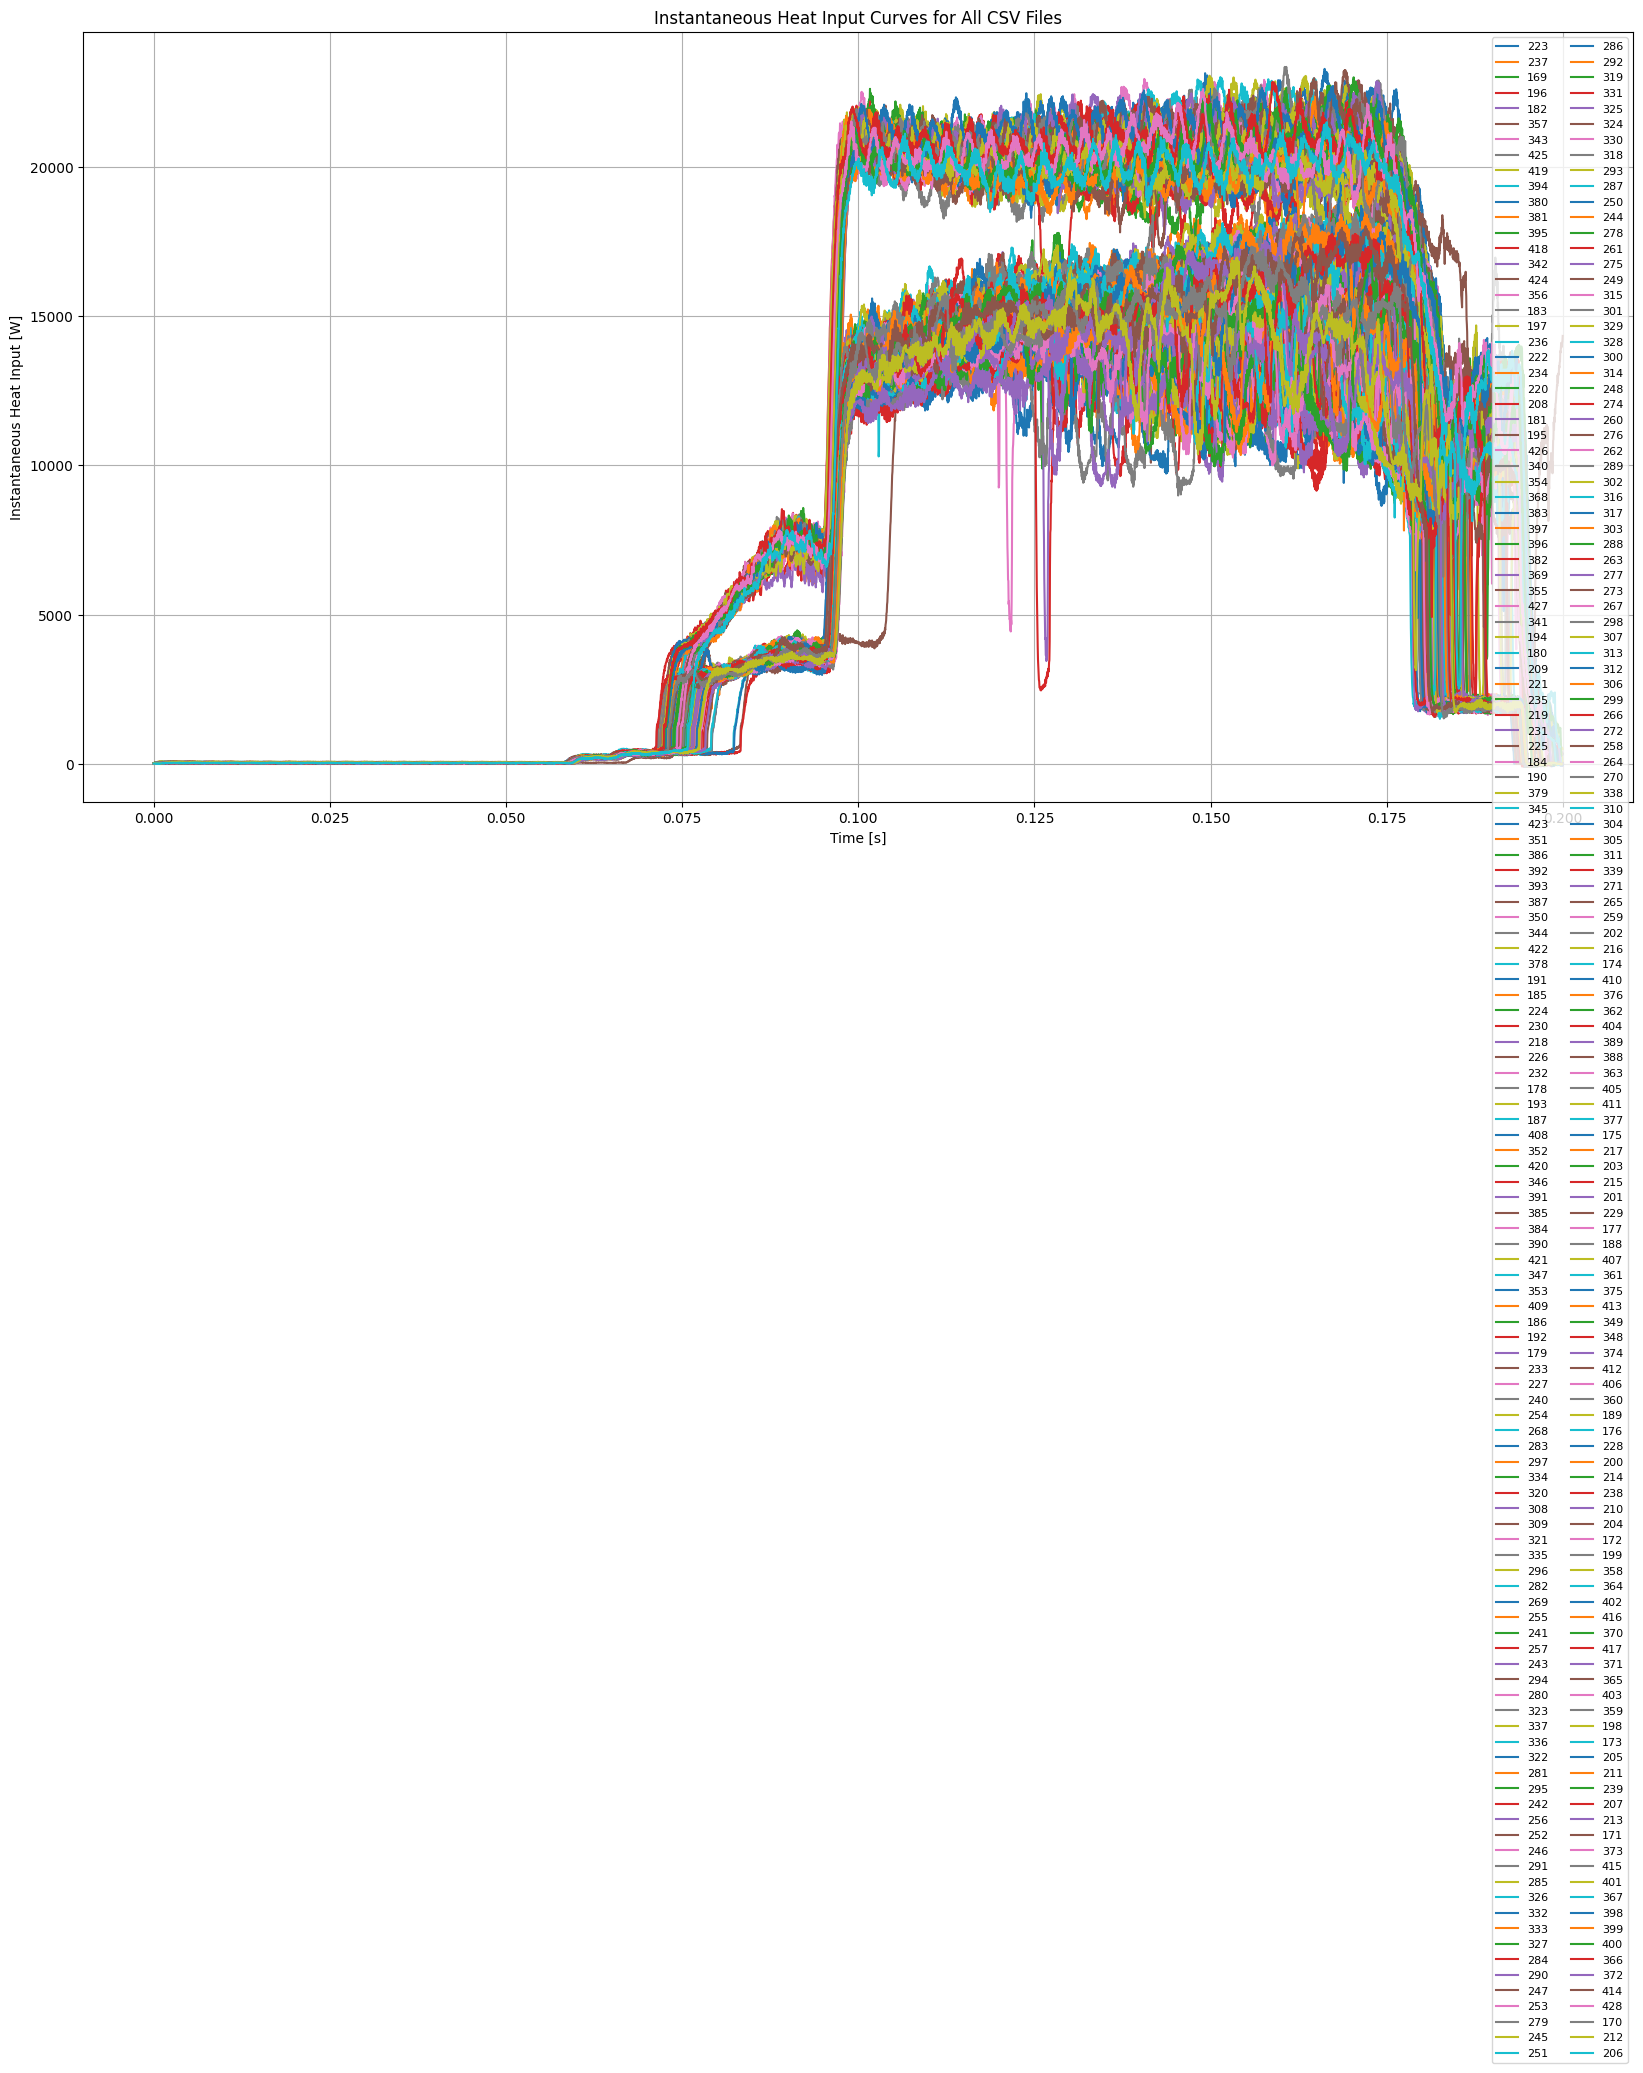

In [39]:
folder_path = "/Users/macbook/Desktop/TUM/kecheng/KIGp/02_Data/02_Weldqas/"

plt.figure(figsize=(20, 10))

for file_name in os.listdir(folder_path):
    if file_name.endswith(".csv"):
        file_path = os.path.join(folder_path, file_name)

        # 读取数据
        df = pd.read_csv(file_path)

        t = df["Time [s]"]
        current = df["Current [A]"]
        voltage = df["Voltage [V]"]

        instantaneous_heat_input = voltage * current

        measurement_number = file_name.split(".")[0]

        plt.plot(t, instantaneous_heat_input, label=f"{measurement_number}")

# 图表设置
plt.xlabel("Time [s]")
plt.ylabel("Instantaneous Heat Input [W]")
plt.title("Instantaneous Heat Input Curves for All CSV Files")
plt.grid(True)
plt.legend(fontsize=8, loc='upper right', ncol=2)  # 可以根据数量调整
plt.tight_layout()

plt.show()

Outlier files:
196.csv
425.csv
419.csv
197.csv
208.csv
195.csv
426.csv
427.csv
194.csv
190.csv
423.csv
422.csv
191.csv
193.csv
420.csv
421.csv
192.csv
240.csv
254.csv
242.csv
252.csv
246.csv
253.csv
251.csv
244.csv
249.csv
248.csv
258.csv
202.csv
203.csv
201.csv
189.csv
200.csv
204.csv
199.csv
198.csv
205.csv
239.csv
207.csv
428.csv
206.csv
Remaining (cleaned) files: ['223.csv', '237.csv', '169.csv', '182.csv', '357.csv', '343.csv', '394.csv', '380.csv', '381.csv', '395.csv', '418.csv', '342.csv', '424.csv', '356.csv', '183.csv', '236.csv', '222.csv', '234.csv', '220.csv', '181.csv', '340.csv', '354.csv', '368.csv', '383.csv', '397.csv', '396.csv', '382.csv', '369.csv', '355.csv', '341.csv', '180.csv', '209.csv', '221.csv', '235.csv', '219.csv', '231.csv', '225.csv', '184.csv', '379.csv', '345.csv', '351.csv', '386.csv', '392.csv', '393.csv', '387.csv', '350.csv', '344.csv', '378.csv', '185.csv', '224.csv', '230.csv', '218.csv', '226.csv', '232.csv', '178.csv', '187.csv', '408.csv', '3

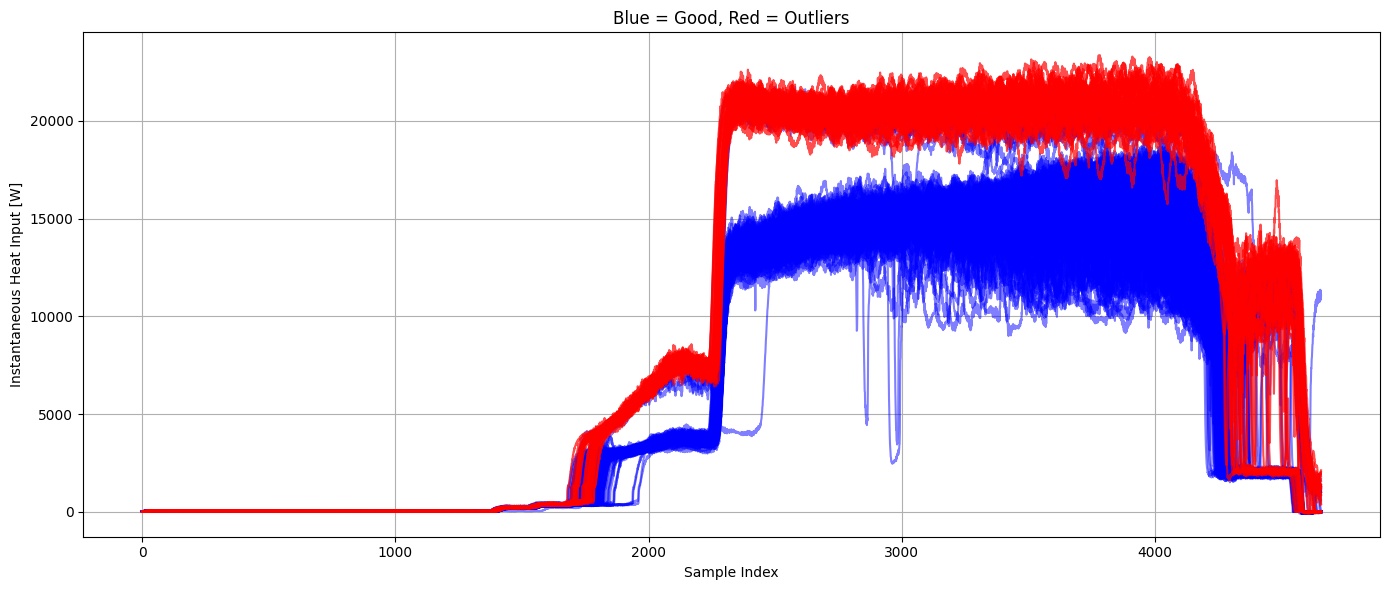

In [45]:
folder_path = "/Users/macbook/Desktop/TUM/kecheng/KIGp/02_Data/02_Weldqas/"

heat_curves = []
file_names = []

# 遍历文件，计算曲线
for file_name in os.listdir(folder_path):
    if file_name.endswith(".csv"):
        file_path = os.path.join(folder_path, file_name)
        df = pd.read_csv(file_path)
        t = df["Time [s]"]
        current = df["Current [A]"]
        voltage = df["Voltage [V]"]
        heat_input = voltage * current

        heat_curves.append(heat_input.values)
        file_names.append(file_name)

# 将所有曲线转换为同样长度的矩阵（取最短长度）
min_len = min(len(c) for c in heat_curves)
heat_curves_trimmed = np.array([c[:min_len] for c in heat_curves])

# 对每条曲线计算其整体均值（也可选取后半段均值）
curve_means = np.mean(heat_curves_trimmed, axis=1)

# 计算中位数 & 标准差
median_mean = np.median(curve_means)
std_mean = np.std(curve_means)

# 设置异常阈值，例如偏离中位数 ±2*std
threshold_upper = median_mean + 2 * std_mean
threshold_lower = median_mean - 2 * std_mean

# 找出正常/异常曲线
good_indices = (curve_means >= threshold_lower) & (curve_means <= threshold_upper)
bad_indices = ~good_indices

# 打印异常文件名
print("Outlier files:")
for idx in np.where(bad_indices)[0]:
    print(file_names[idx])

# 生成新的文件列表（去除异常）
cleaned_file_names = [file_names[i] for i in np.where(good_indices)[0]]
print("Remaining (cleaned) files:", cleaned_file_names)

# 可视化
plt.figure(figsize=(14, 6))
for i in np.where(good_indices)[0]:
    plt.plot(heat_curves_trimmed[i], color='blue', alpha=0.5)
for i in np.where(bad_indices)[0]:
    plt.plot(heat_curves_trimmed[i], color='red', alpha=0.7)
plt.title("Blue = Good, Red = Outliers")
plt.xlabel("Sample Index")
plt.ylabel("Instantaneous Heat Input [W]")
plt.grid(True)
plt.tight_layout()
plt.show()

Audio转stft

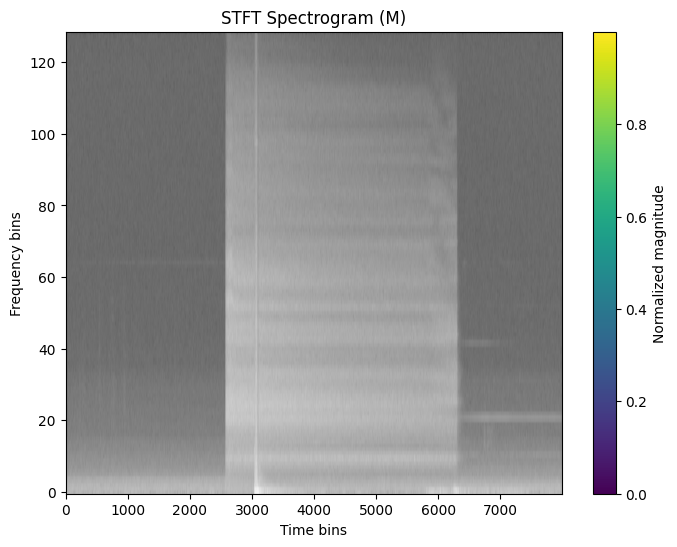

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import stft

# ------------------------------
# 读取文件
# ------------------------------
file_path = "/Users/macbook/Desktop/TUM/kecheng/KIGp/02_Data/01_Audio/169.csv"

df = pd.read_csv(file_path)

# ------------------------------
# 提取 M 信号
# ------------------------------
m = df["M"].values
time = df["Time"].values

# ------------------------------
# 计算采样频率
# ------------------------------
fs = 1 / (time[1] - time[0])

# ------------------------------
# STFT
# ------------------------------
f_m, t_m, Zxx_m = stft(m, fs=fs, nperseg=256)

# 幅值谱 (对数)
mag_m = 20 * np.log10(np.abs(Zxx_m) + 1e-6)

# ------------------------------
# 归一化
# ------------------------------
def normalize(x):
    return (x - x.min()) / (x.max() - x.min() + 1e-6)

mag_norm = normalize(mag_m)

# ------------------------------
# 拼成 3 通道（3 个一样的副本，方便 CNN ）
# ------------------------------
spectrogram_rgb = np.stack([mag_norm, mag_norm, mag_norm], axis=-1)

# ------------------------------
# 直接展示
# ------------------------------
plt.figure(figsize=(8, 6))
plt.imshow(spectrogram_rgb, aspect='auto', origin='lower')
plt.title("STFT Spectrogram (M)")
plt.xlabel("Time bins")
plt.ylabel("Frequency bins")
plt.colorbar(label="Normalized magnitude")
plt.show()